In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from torch import optim
import torch
import numpy as np

# Dataset

In [3]:
from dataset import get_pytorch_datataset, BATCH_SIZE

df_returns_real, dataset, dataloader, N_ASSETS, WINDOW_SIZE = get_pytorch_datataset()

print(f'\nDataset length: {len(dataset)}')
print(f'Number of assets: {N_ASSETS}')
sample_batch = next(iter(dataloader))
assert sample_batch.size() == (BATCH_SIZE, N_ASSETS, WINDOW_SIZE)
print(f'Sample batch: {sample_batch.size()}')

Chosen tickers: ['SBER', 'SBERP', 'LKOH', 'VTBR', 'MOEX']
Length before dropping NaNs: 2603
Length after dropping NaNs: 2577

Dataset length: 2451
Number of assets: 5
Sample batch: torch.Size([256, 5, 126])


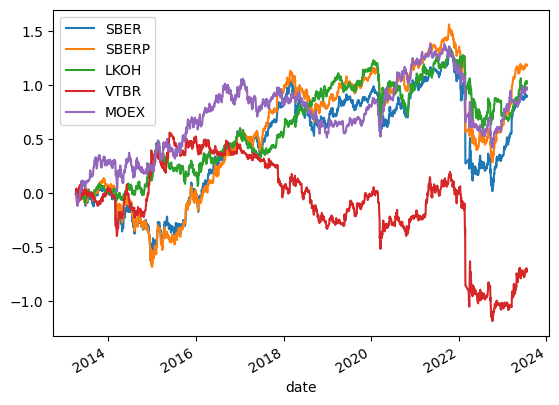

In [4]:
df_returns_real.cumsum().plot()
plt.show()

# GAN TCN


In [5]:
from constants import DEVICE

print(f'Use device: {DEVICE}')

Use device: cpu


In [6]:
from gan import Discriminator, Generator

assert Discriminator()(next(iter(dataloader))).size() == (BATCH_SIZE,)
assert Generator()(Generator.get_noise(BATCH_SIZE)).size() == next(iter(dataloader)).size()

/Users/nikolajgudkov/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


## Train

/Users/nikolajgudkov/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


  0%|          | 0/800 [00:00<?, ?it/s]

50 epochs train time: 172.5s. Estimated train time: 43.1m
tensor(0.0329)
1 torch.Size([1, 5, 126])
Fake std: [0.83929485 0.6129487  0.66745377 0.62214416 0.6422477 ].
Real std: [0.02320357 0.02170969 0.01934618 0.02256658 0.01871406]
Fake correlation: 0.35448229120140445. Real correlation: 0.9185647795211369


/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')
/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')


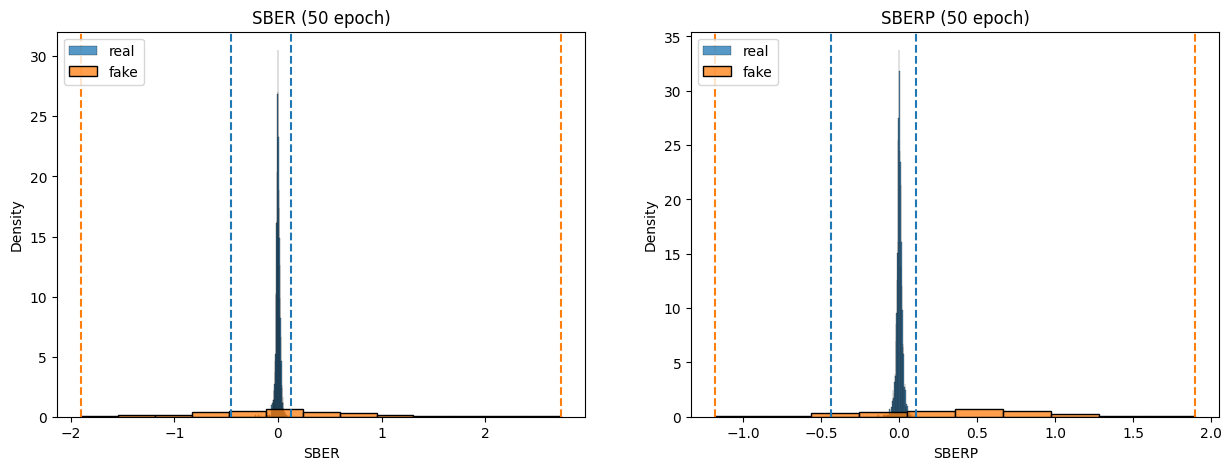

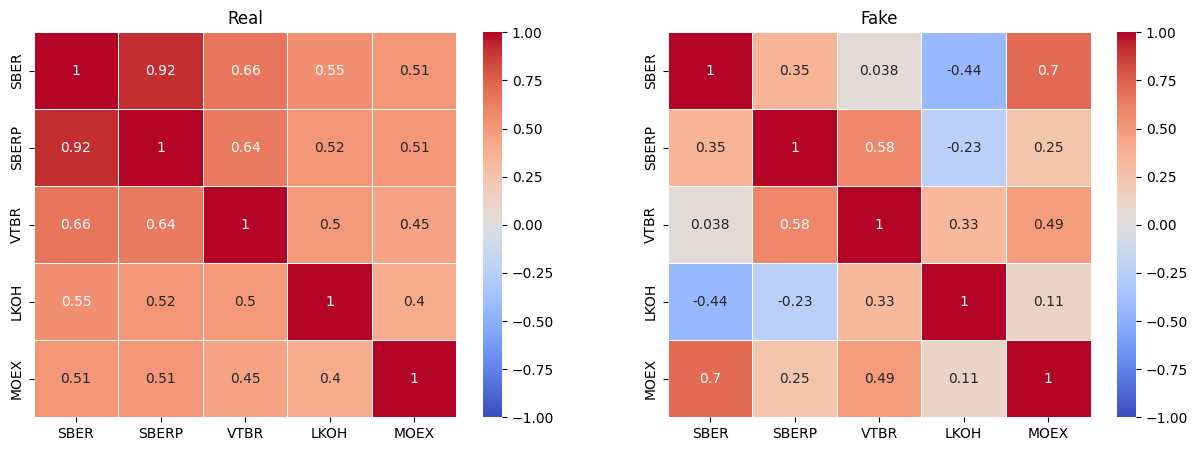

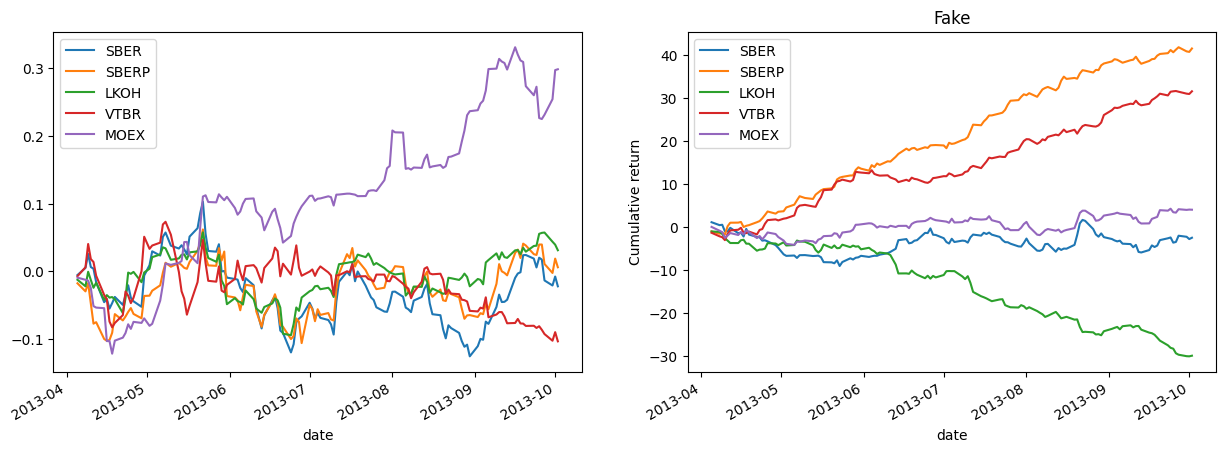

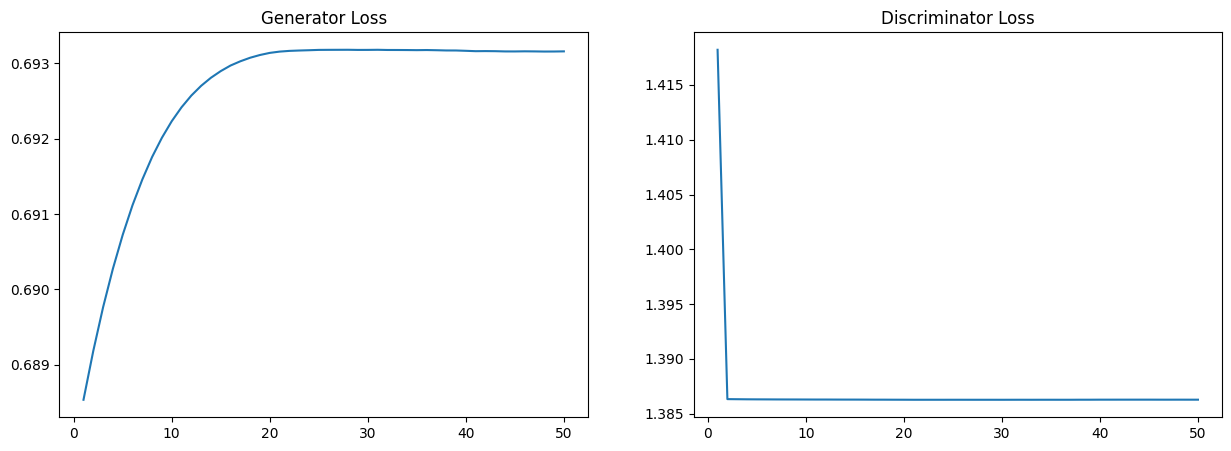

50 epochs train time: 178.3s. Estimated train time: 41.6m
tensor(-0.0207)
1 torch.Size([1, 5, 126])
Fake std: [0.4528396  0.37599516 0.30469072 0.36009282 0.3689258 ].
Real std: [0.02320357 0.02170969 0.01934618 0.02256658 0.01871406]
Fake correlation: -0.11057882012542956. Real correlation: 0.9185647795211369


/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')
/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')


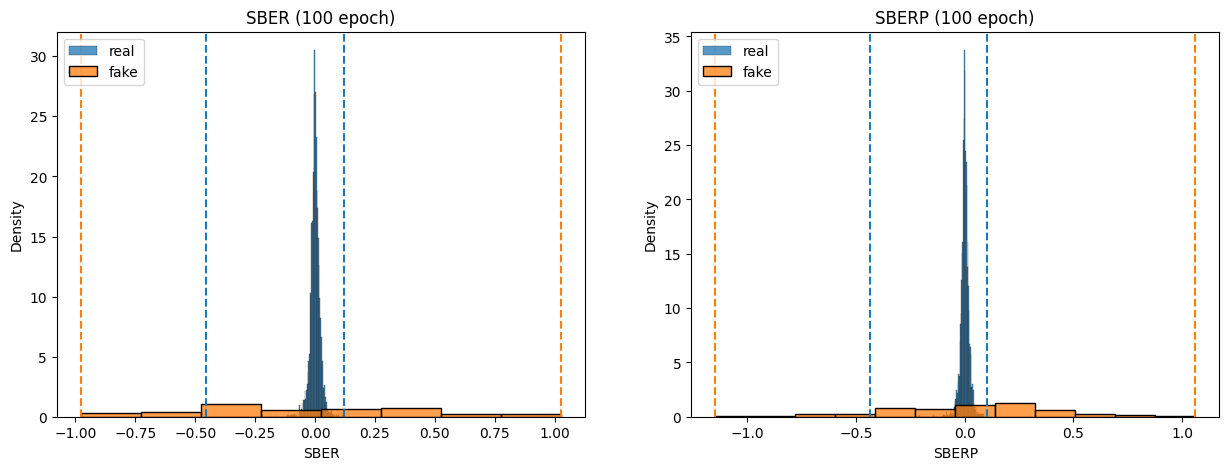

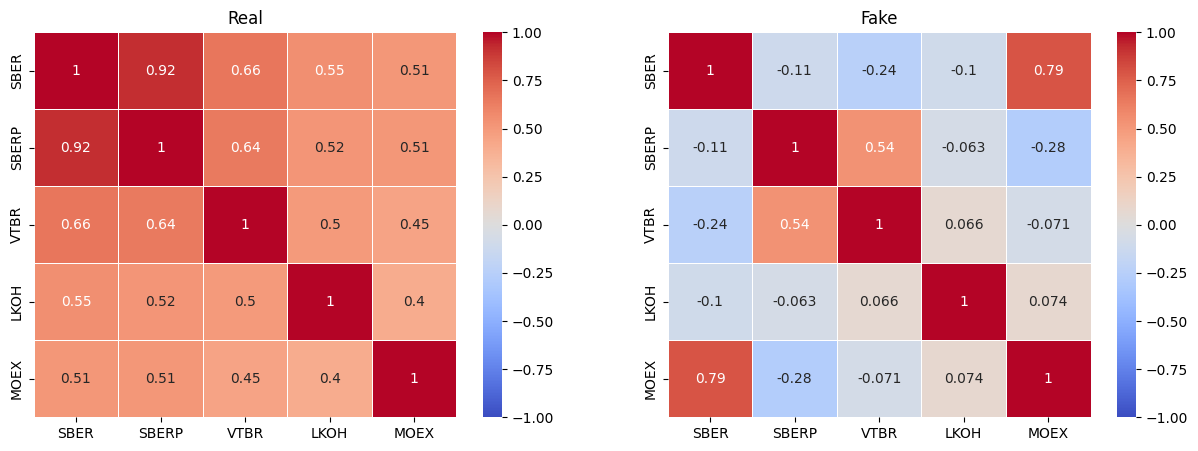

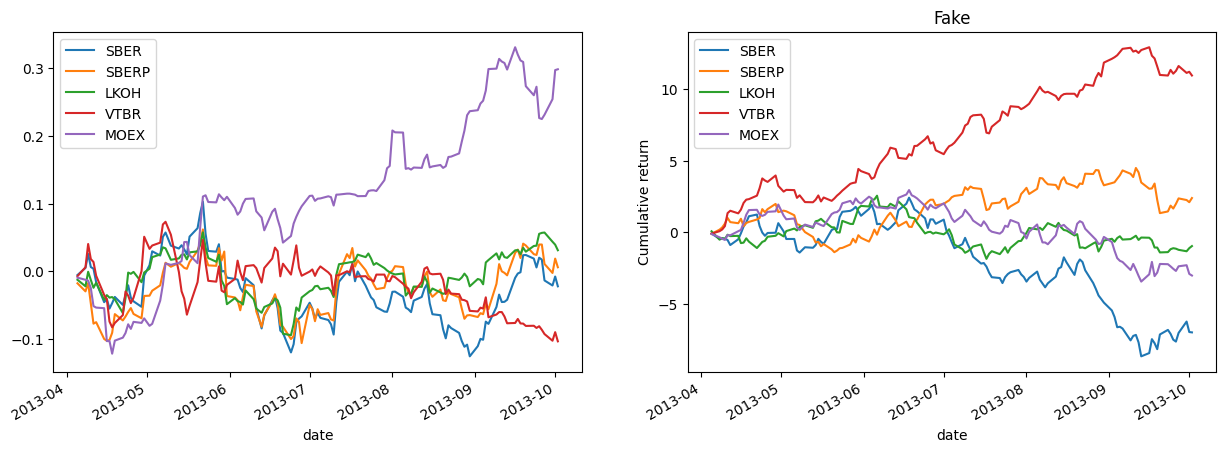

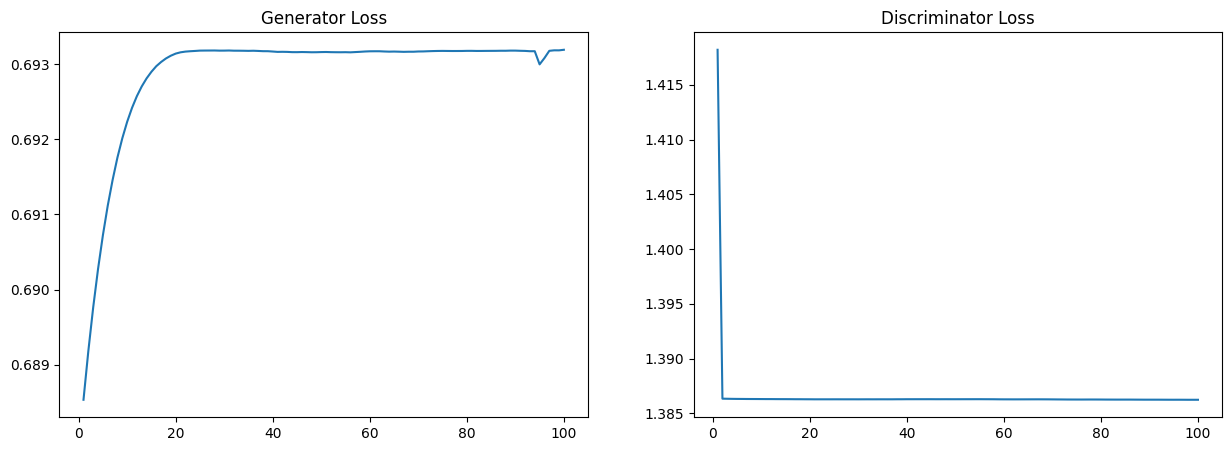

50 epochs train time: 174.2s. Estimated train time: 37.7m
tensor(-0.0060)
1 torch.Size([1, 5, 126])
Fake std: [0.19116634 0.22946778 0.15975256 0.21708107 0.20329799].
Real std: [0.02320357 0.02170969 0.01934618 0.02256658 0.01871406]
Fake correlation: -0.41636888940232497. Real correlation: 0.9185647795211369


/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')
/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')


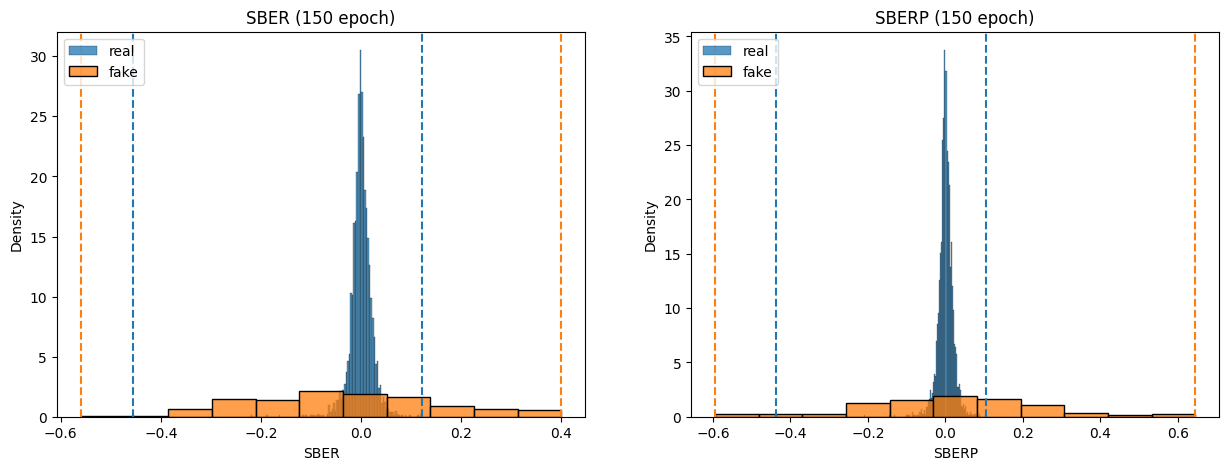

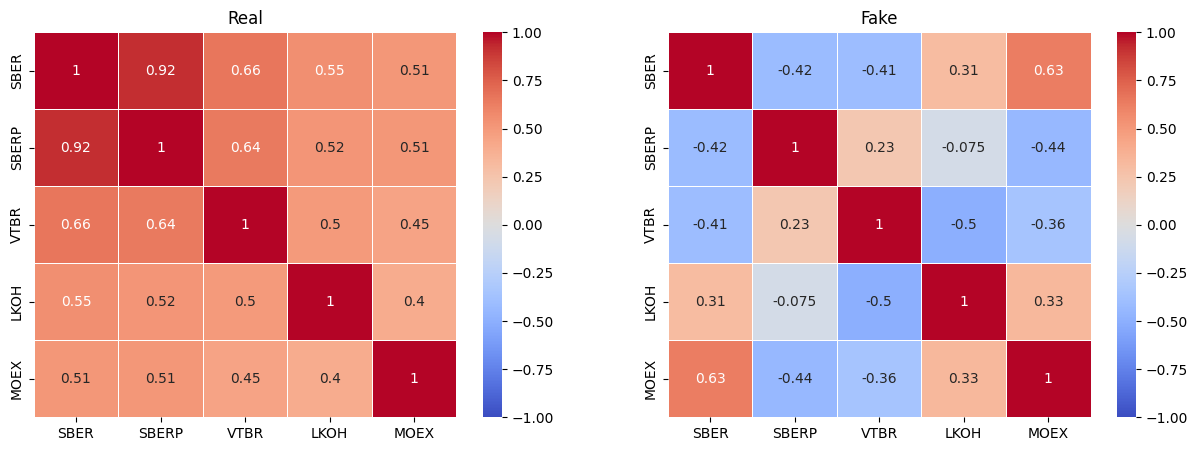

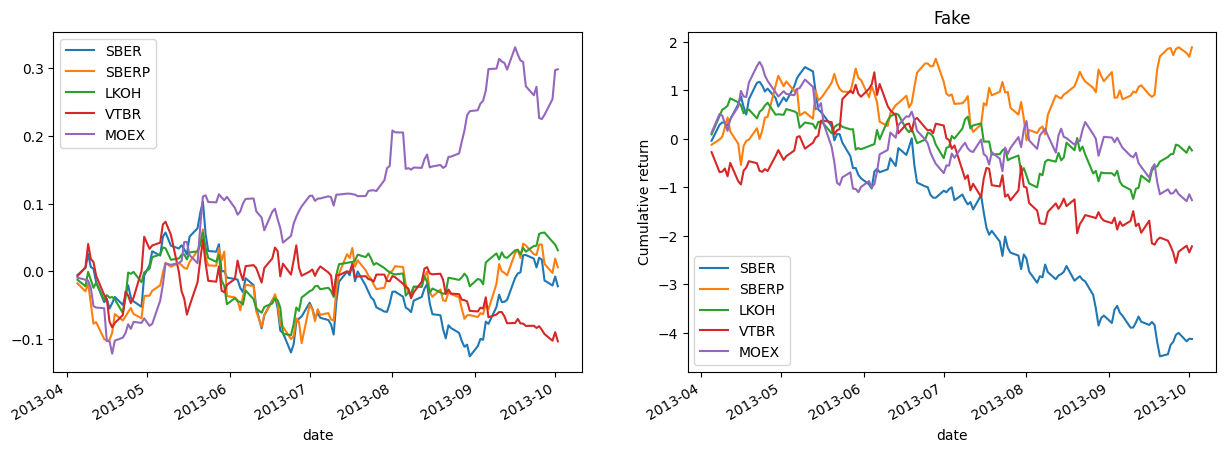

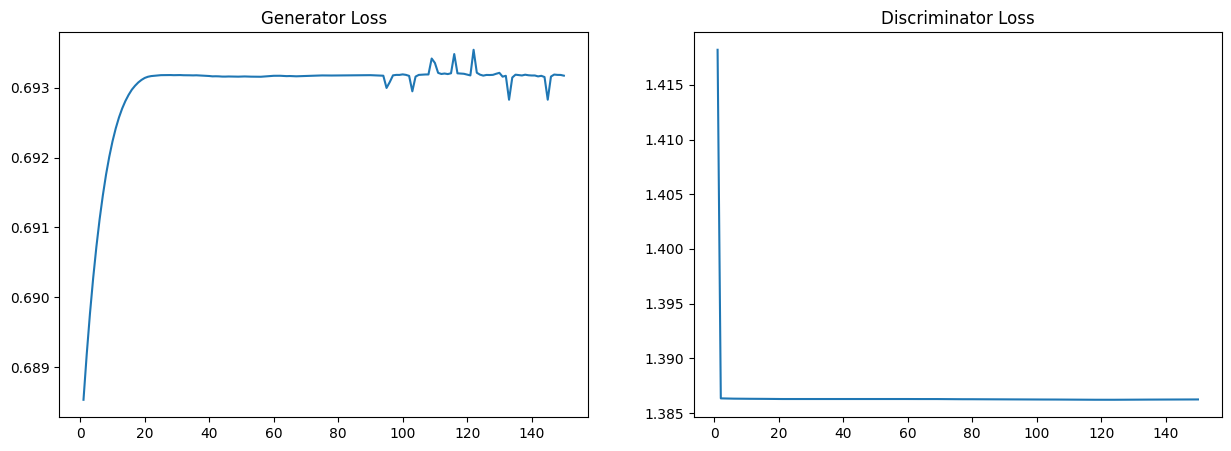

50 epochs train time: 189.4s. Estimated train time: 37.9m
tensor(-0.0031)
1 torch.Size([1, 5, 126])
Fake std: [0.09758514 0.1281574  0.08590392 0.145615   0.10497447].
Real std: [0.02320357 0.02170969 0.01934618 0.02256658 0.01871406]
Fake correlation: -0.20760300306512414. Real correlation: 0.9185647795211369


/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')
/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')


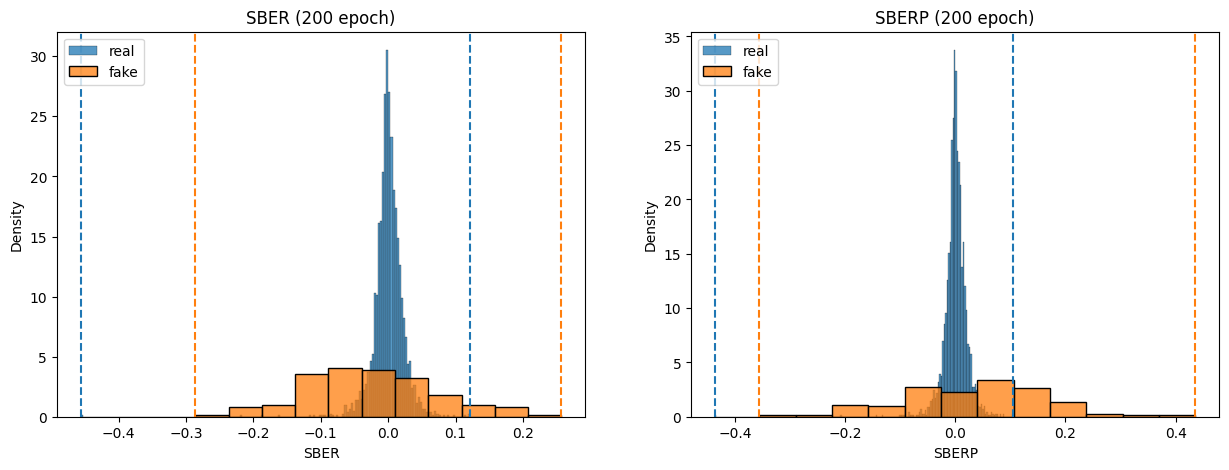

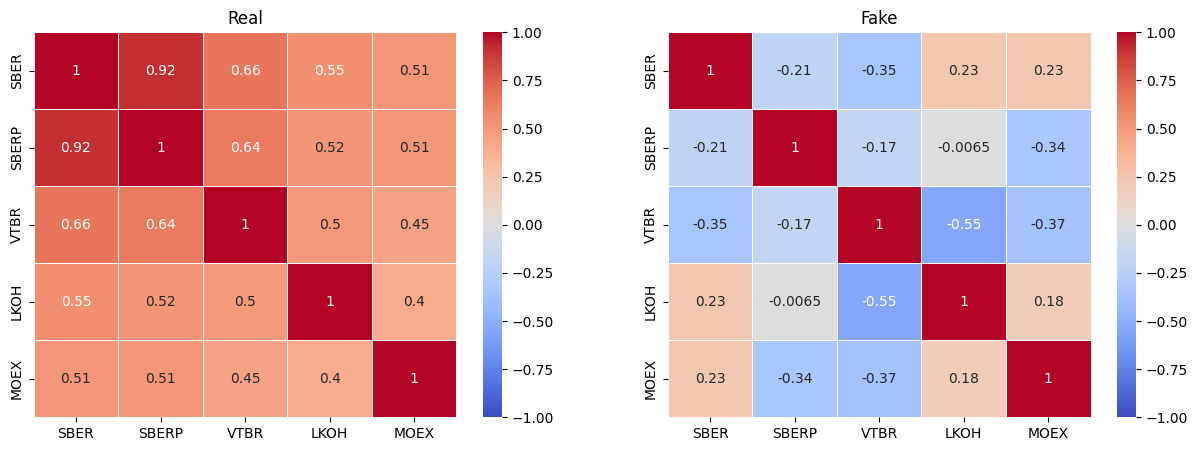

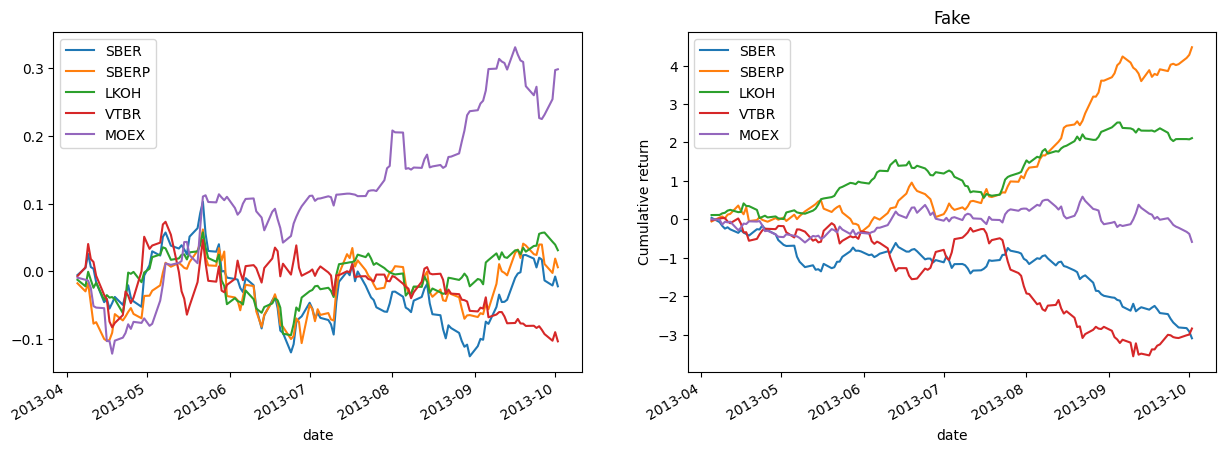

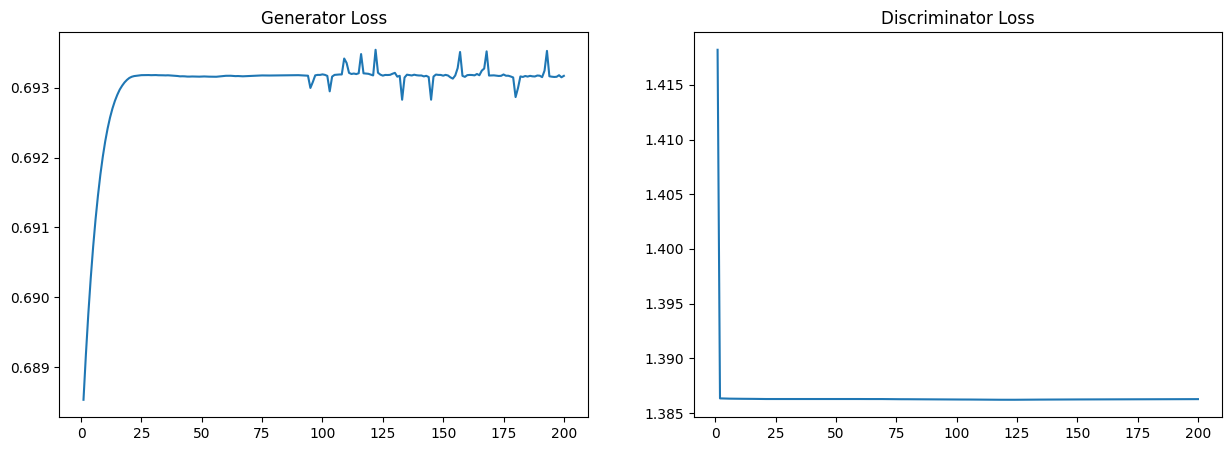

50 epochs train time: 218.4s. Estimated train time: 40.0m
tensor(0.0221)
1 torch.Size([1, 5, 126])
Fake std: [0.06671984 0.08720826 0.04808854 0.08287477 0.07766888].
Real std: [0.02320357 0.02170969 0.01934618 0.02256658 0.01871406]
Fake correlation: -0.5752879978455555. Real correlation: 0.9185647795211369


/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')
/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')


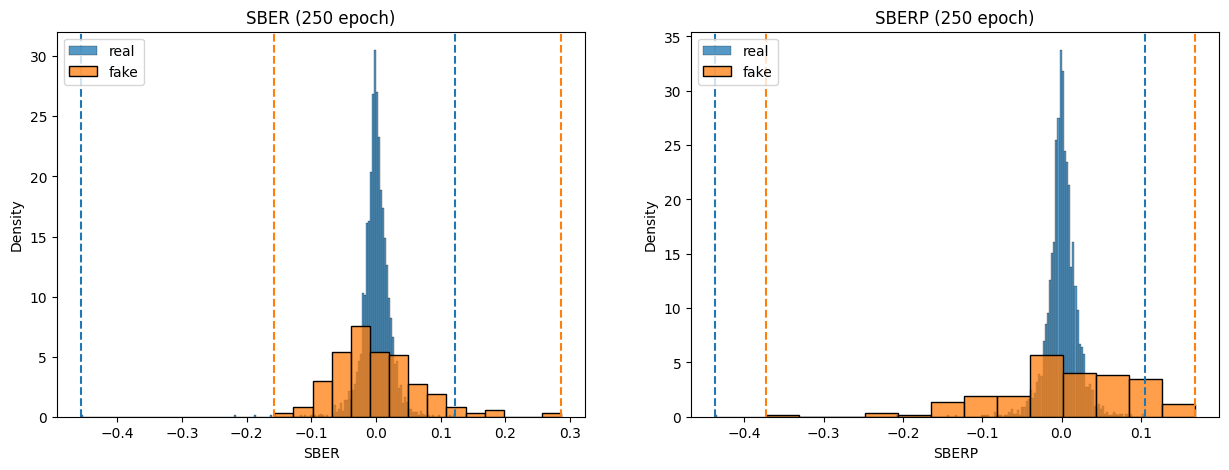

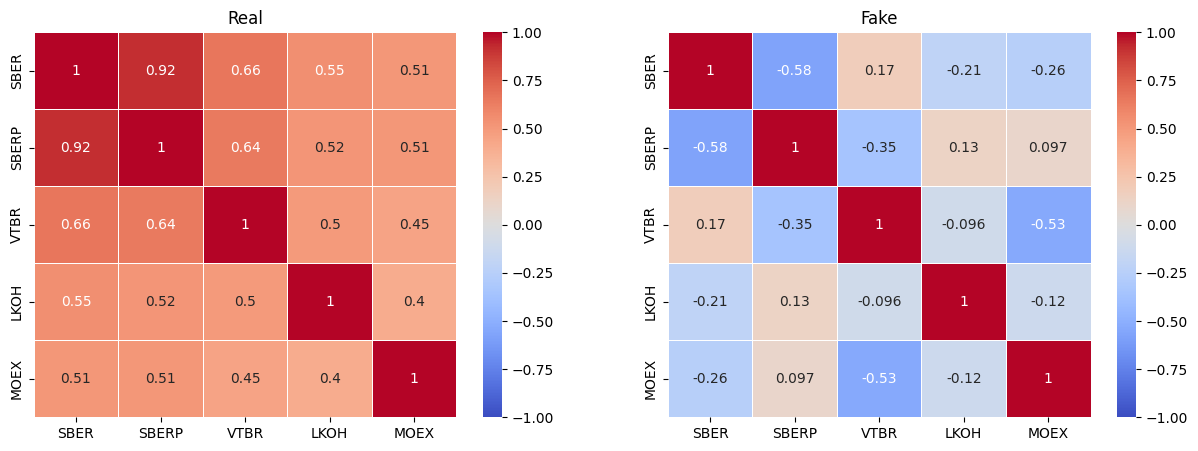

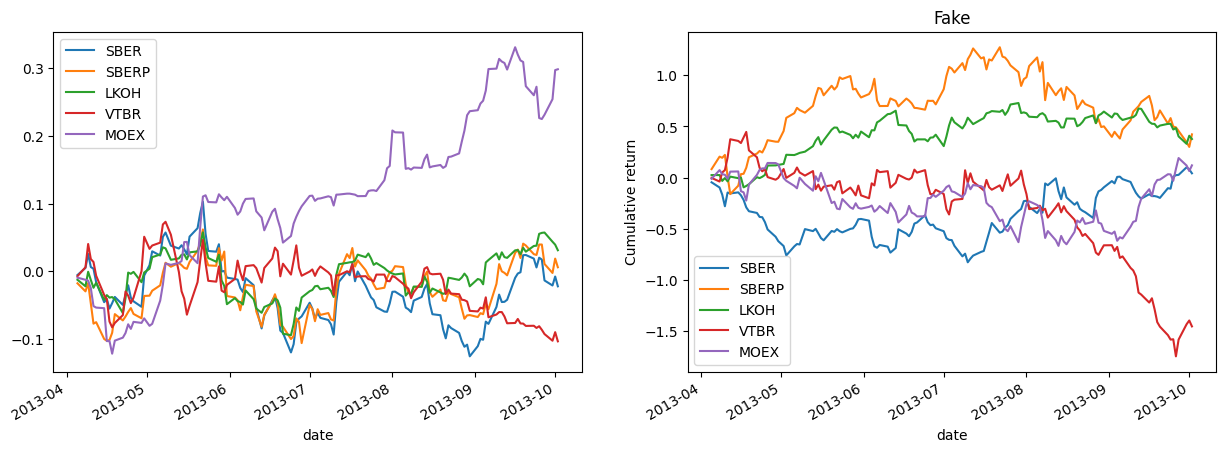

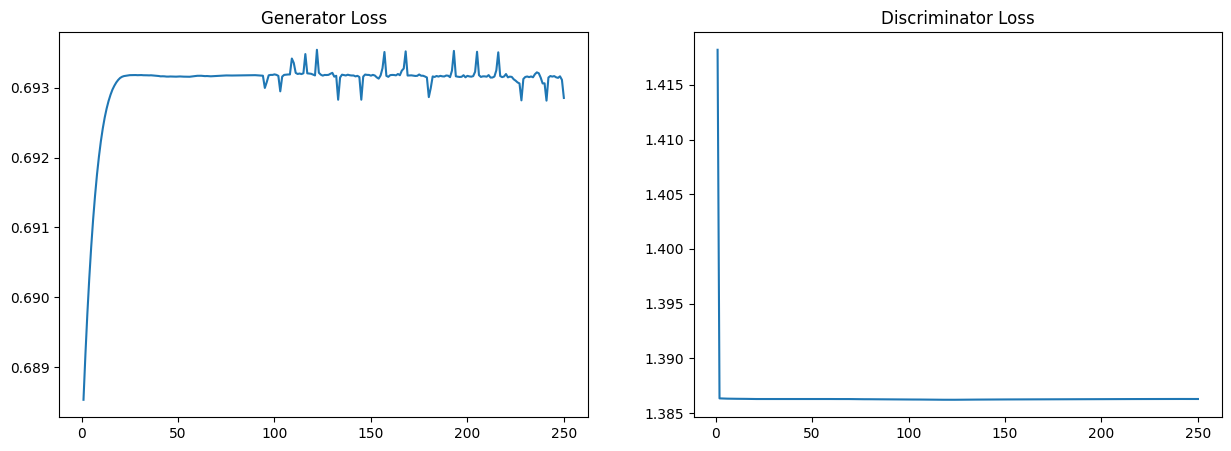

50 epochs train time: 219.2s. Estimated train time: 36.5m
tensor(-0.0174)
1 torch.Size([1, 5, 126])
Fake std: [0.03981696 0.03750616 0.0375196  0.03764893 0.04621194].
Real std: [0.02320357 0.02170969 0.01934618 0.02256658 0.01871406]
Fake correlation: -0.41088940868724827. Real correlation: 0.9185647795211369


/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')
/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')


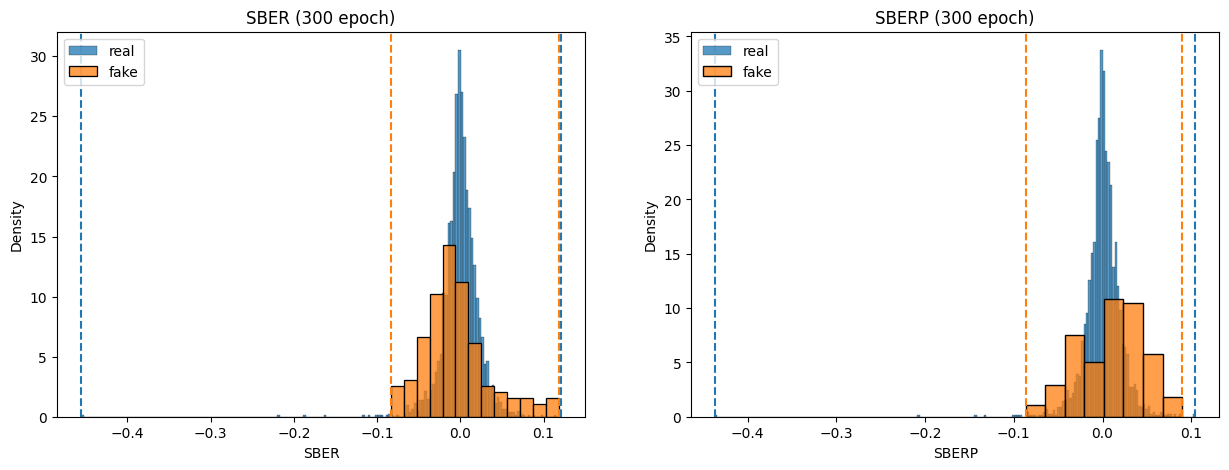

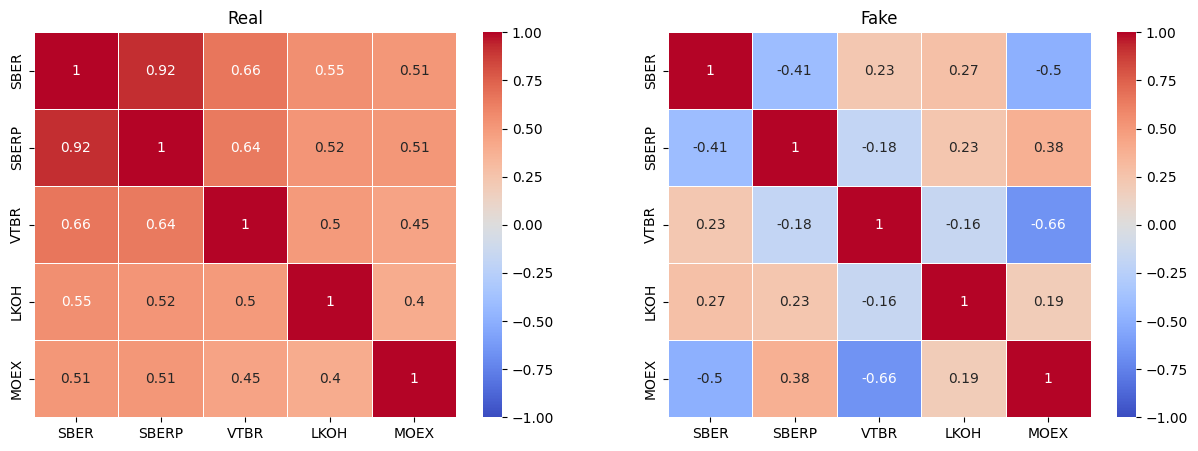

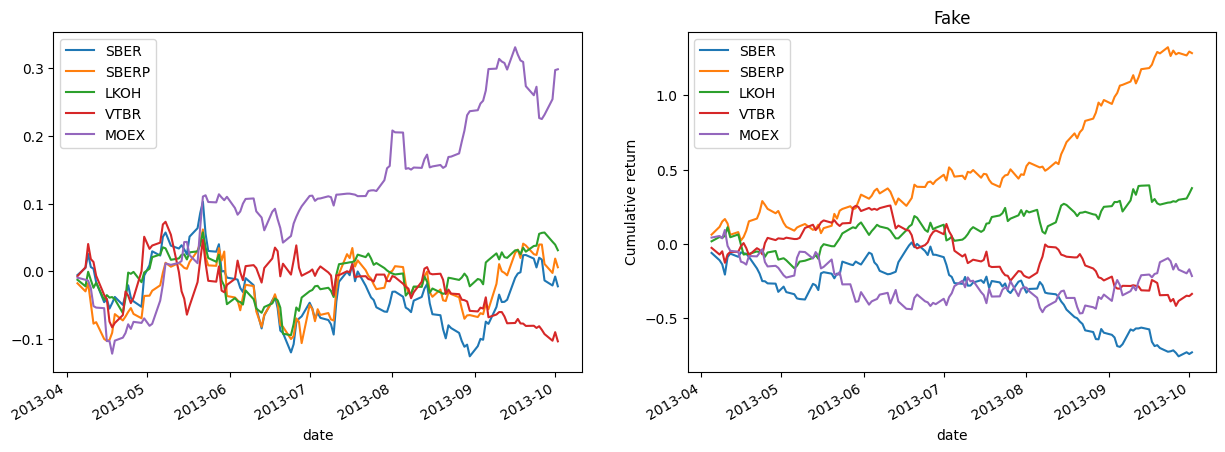

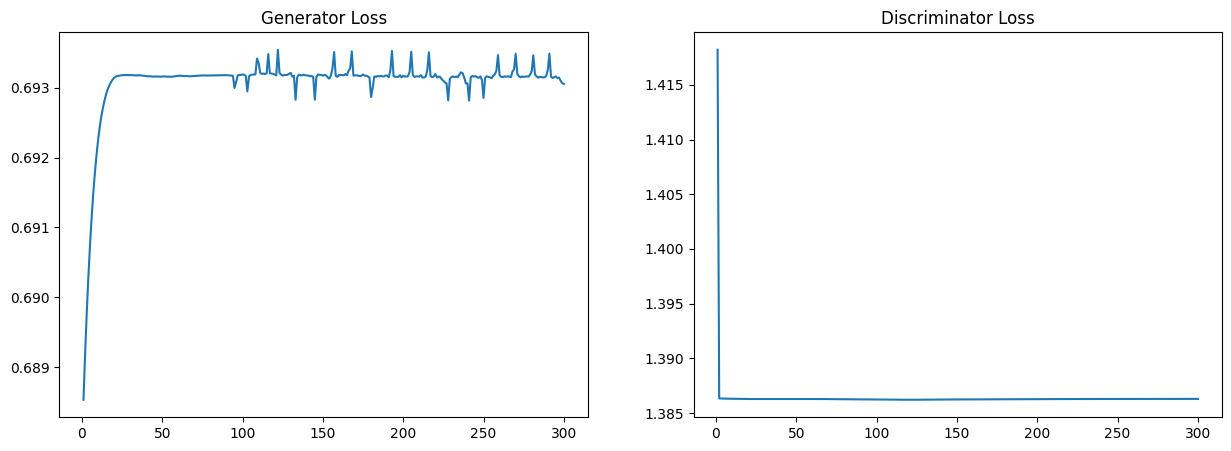

50 epochs train time: 203.7s. Estimated train time: 30.6m
tensor(-0.0072)
1 torch.Size([1, 5, 126])
Fake std: [0.01591452 0.05121813 0.02215774 0.02158386 0.05044748].
Real std: [0.02320357 0.02170969 0.01934618 0.02256658 0.01871406]
Fake correlation: 0.04596872907335347. Real correlation: 0.9185647795211369


/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')
/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')


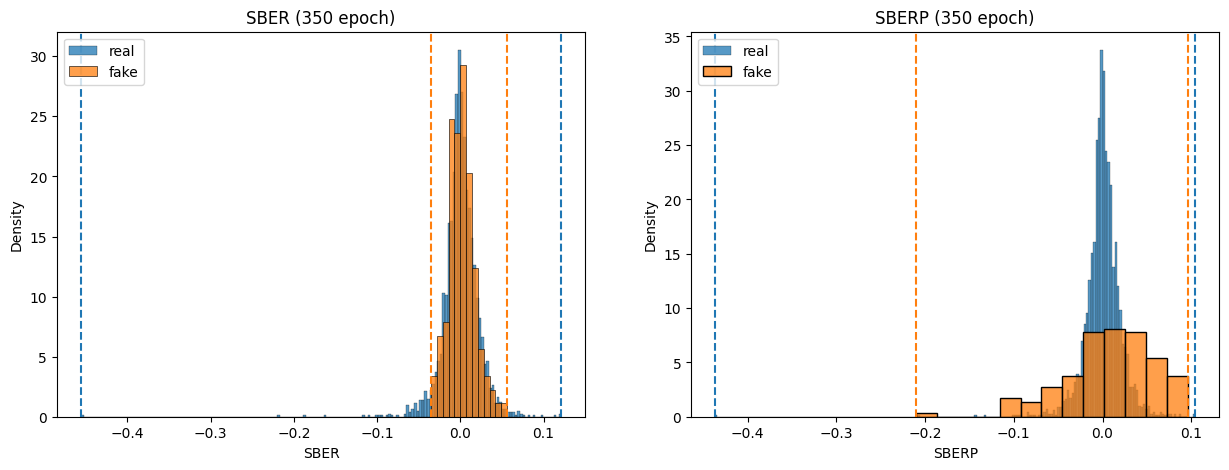

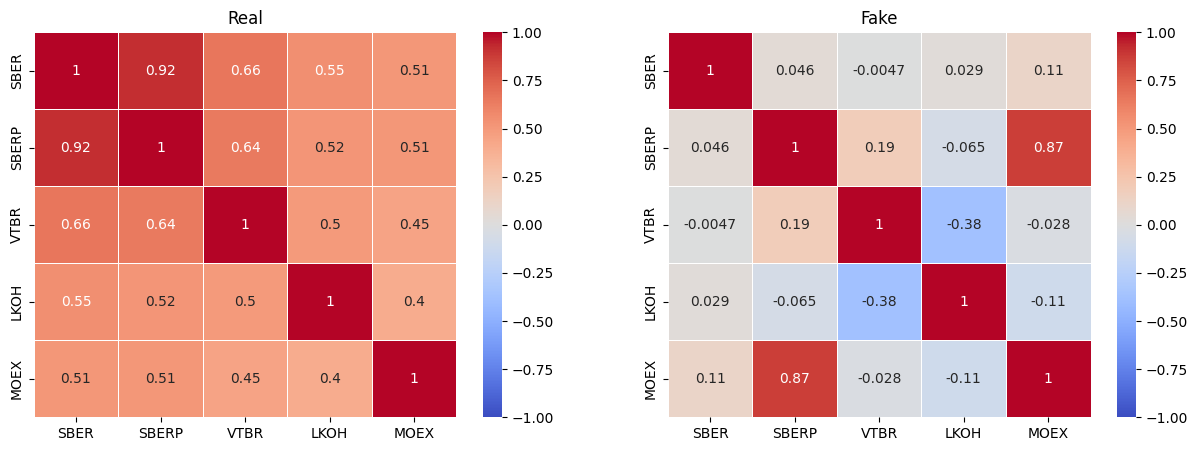

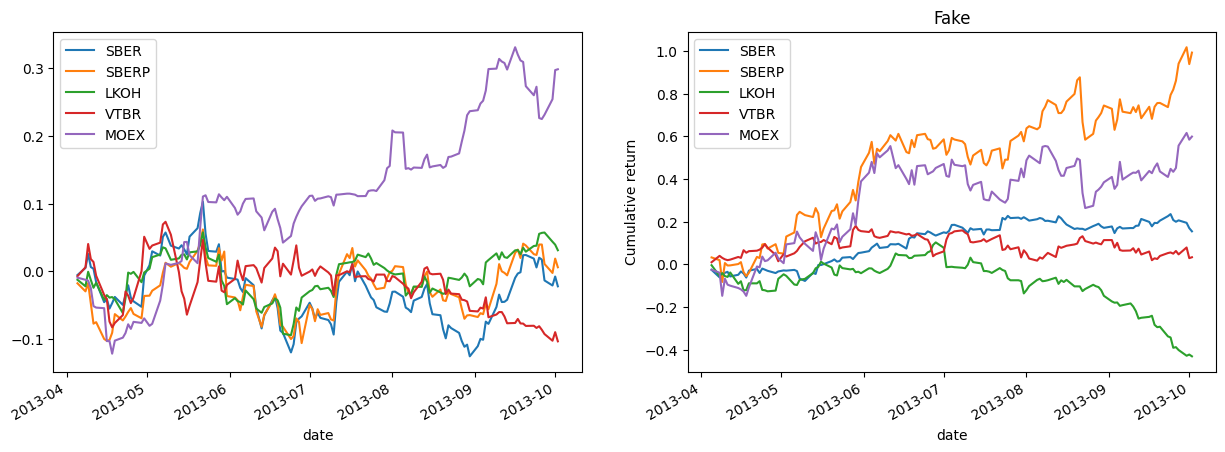

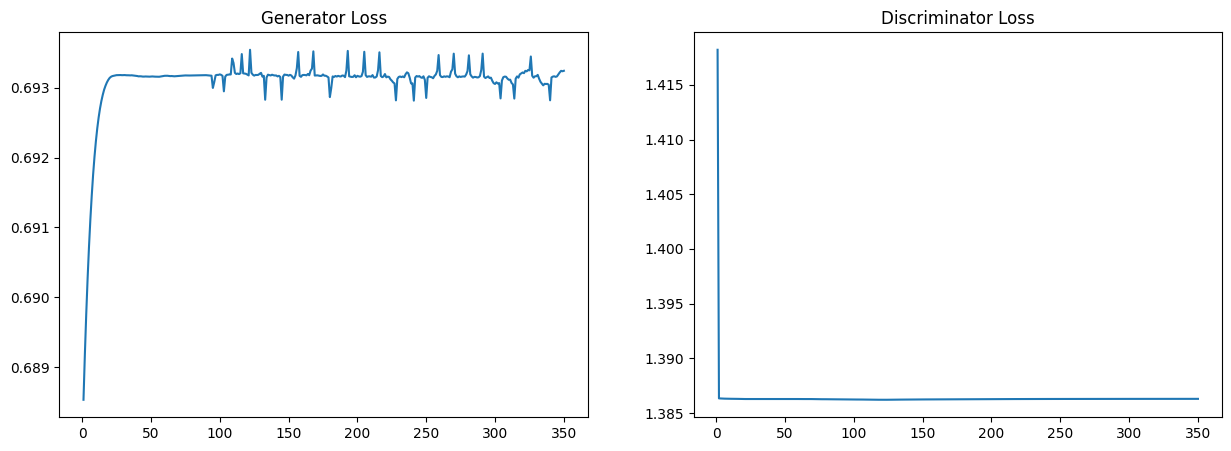

50 epochs train time: 220.3s. Estimated train time: 29.4m
tensor(0.0193)
1 torch.Size([1, 5, 126])
Fake std: [0.02061351 0.0246169  0.01289281 0.01262474 0.015045  ].
Real std: [0.02320357 0.02170969 0.01934618 0.02256658 0.01871406]
Fake correlation: 0.8182367373605851. Real correlation: 0.9185647795211369


/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')
/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')


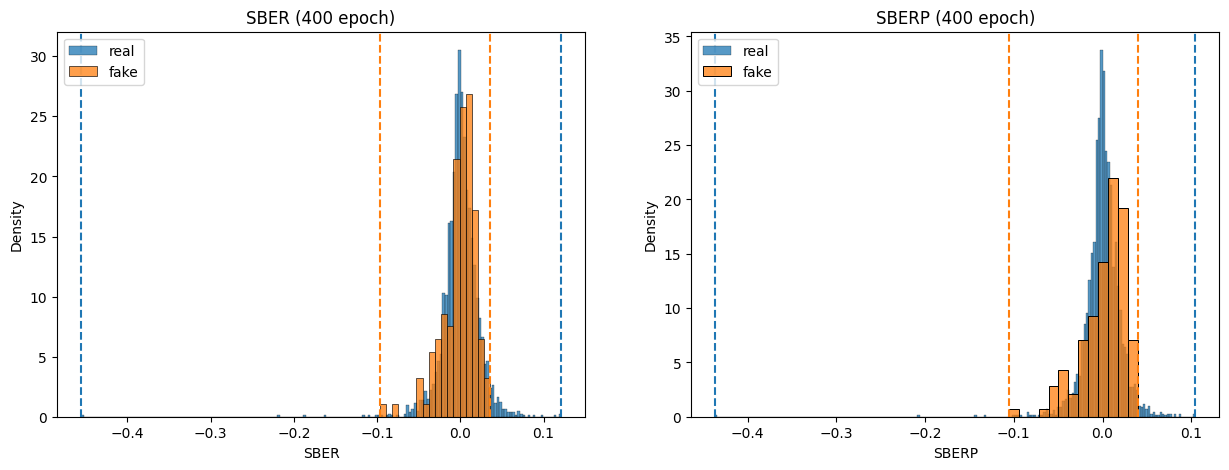

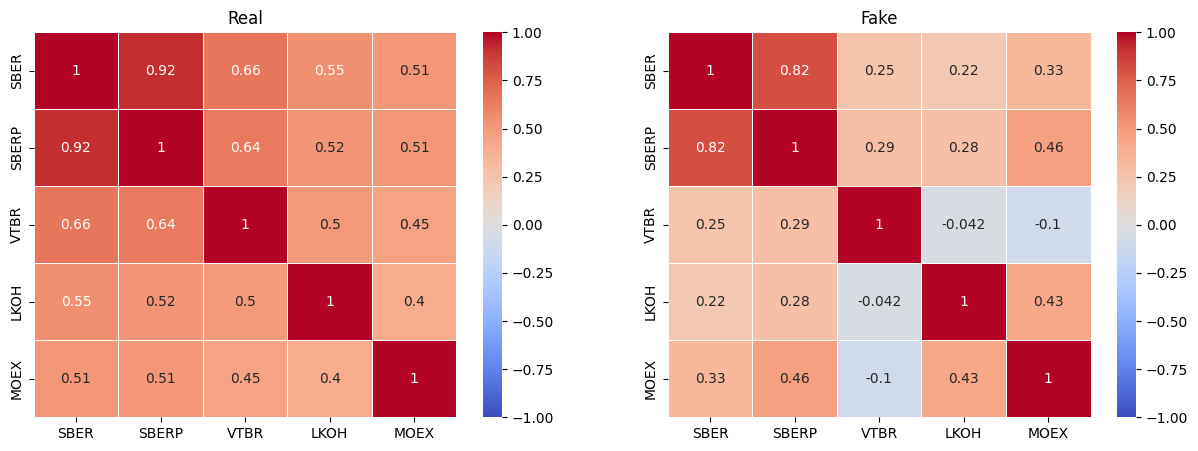

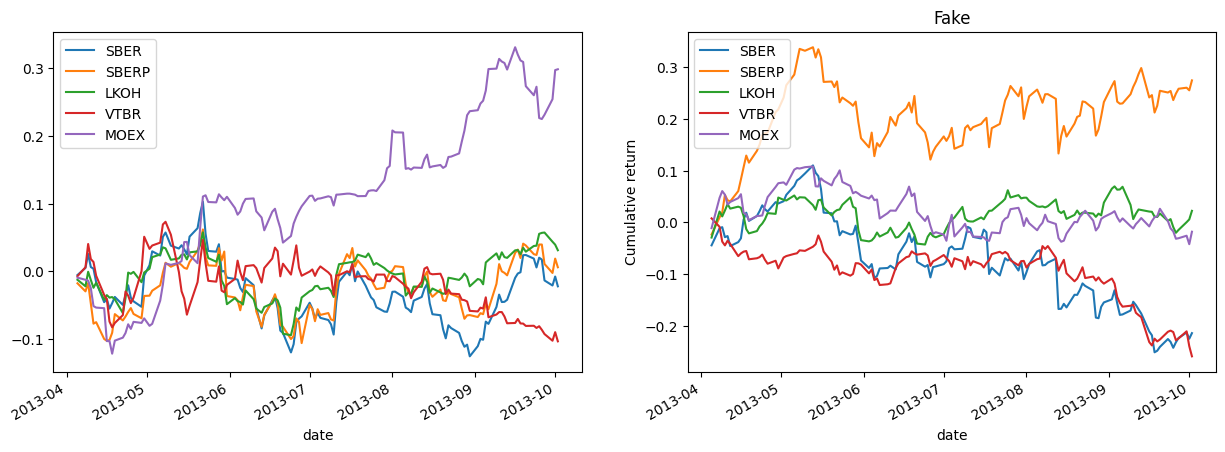

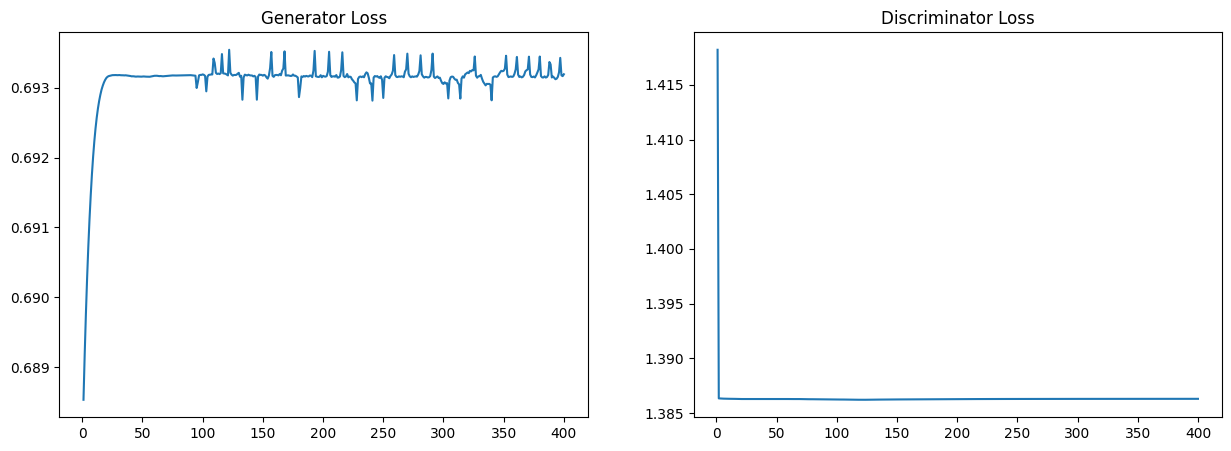

50 epochs train time: 247.3s. Estimated train time: 28.8m
tensor(-0.0377)
1 torch.Size([1, 5, 126])
Fake std: [0.02168798 0.02892393 0.01254313 0.01368915 0.01409058].
Real std: [0.02320357 0.02170969 0.01934618 0.02256658 0.01871406]
Fake correlation: 0.8074596553645174. Real correlation: 0.9185647795211369


/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')
/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')


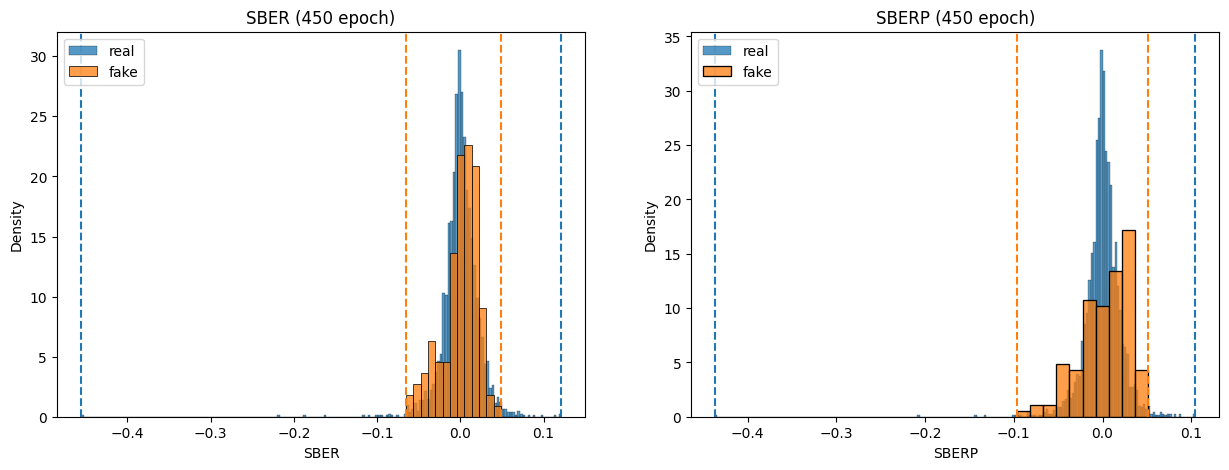

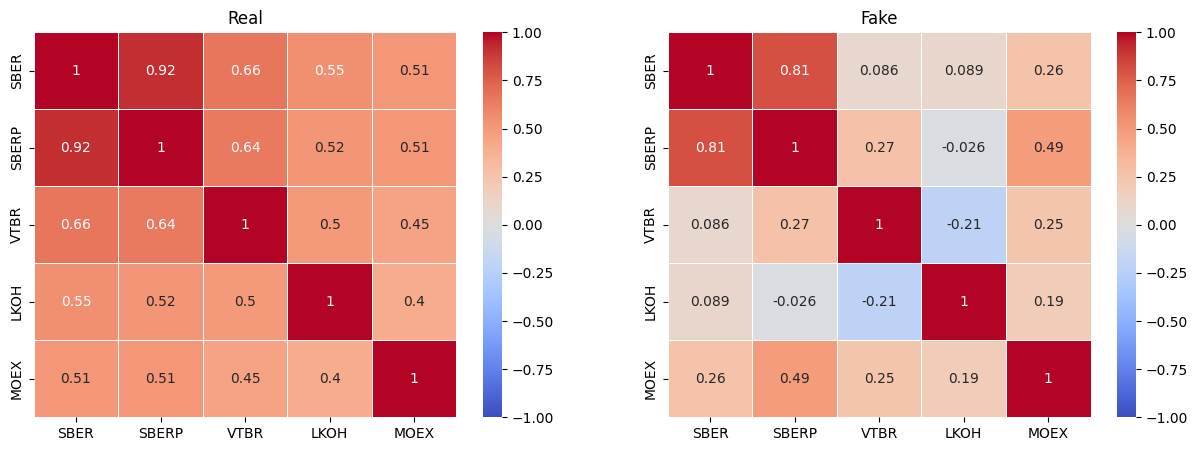

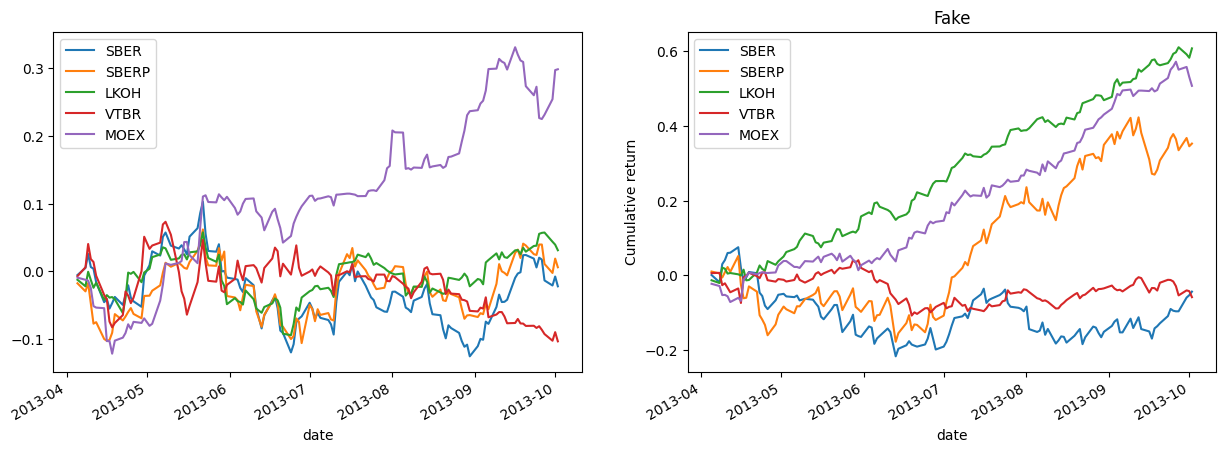

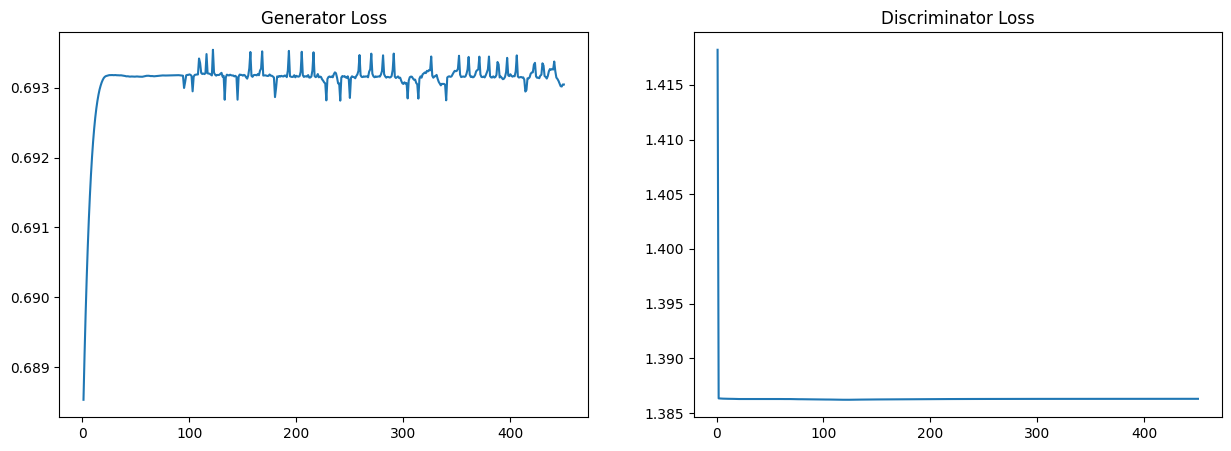

50 epochs train time: 255.0s. Estimated train time: 25.5m
tensor(-0.0027)
1 torch.Size([1, 5, 126])
Fake std: [0.02639687 0.03328072 0.017389   0.01399935 0.01575712].
Real std: [0.02320357 0.02170969 0.01934618 0.02256658 0.01871406]
Fake correlation: 0.9165858375460779. Real correlation: 0.9185647795211369


/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')
/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')


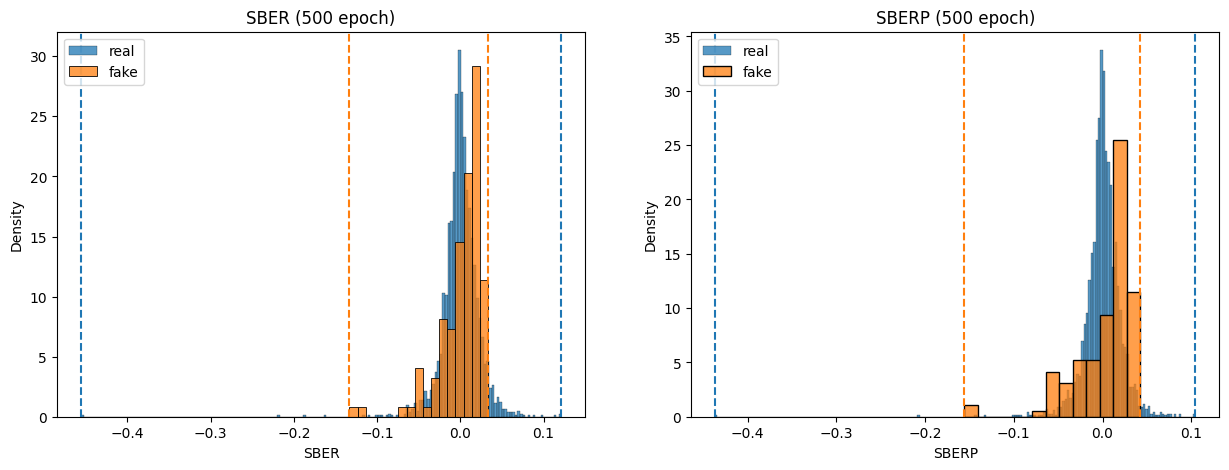

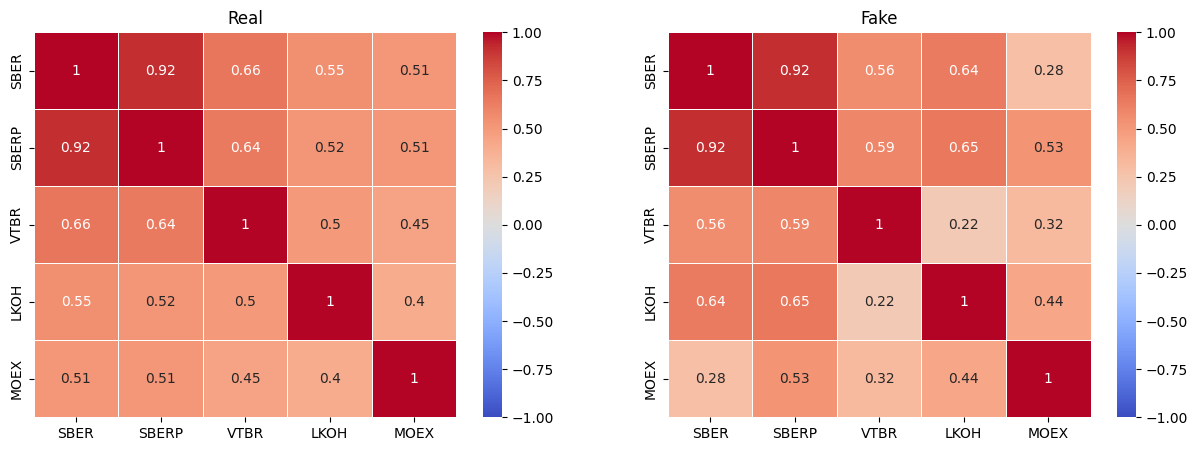

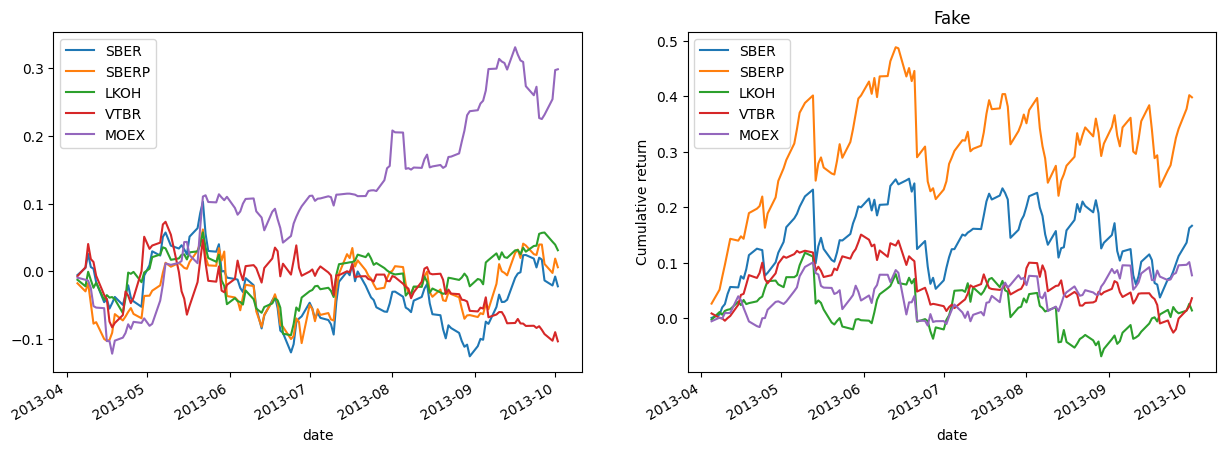

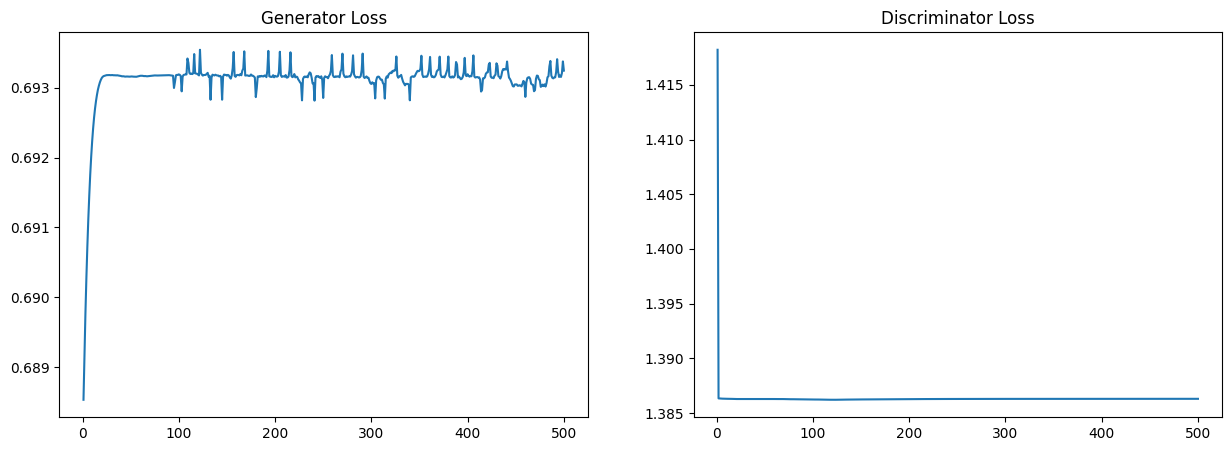

50 epochs train time: 222.5s. Estimated train time: 18.5m
tensor(-0.0104)
1 torch.Size([1, 5, 126])
Fake std: [0.0134958  0.01655345 0.01290898 0.01374432 0.01238251].
Real std: [0.02320357 0.02170969 0.01934618 0.02256658 0.01871406]
Fake correlation: 0.8026222854814395. Real correlation: 0.9185647795211369


/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')
/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')


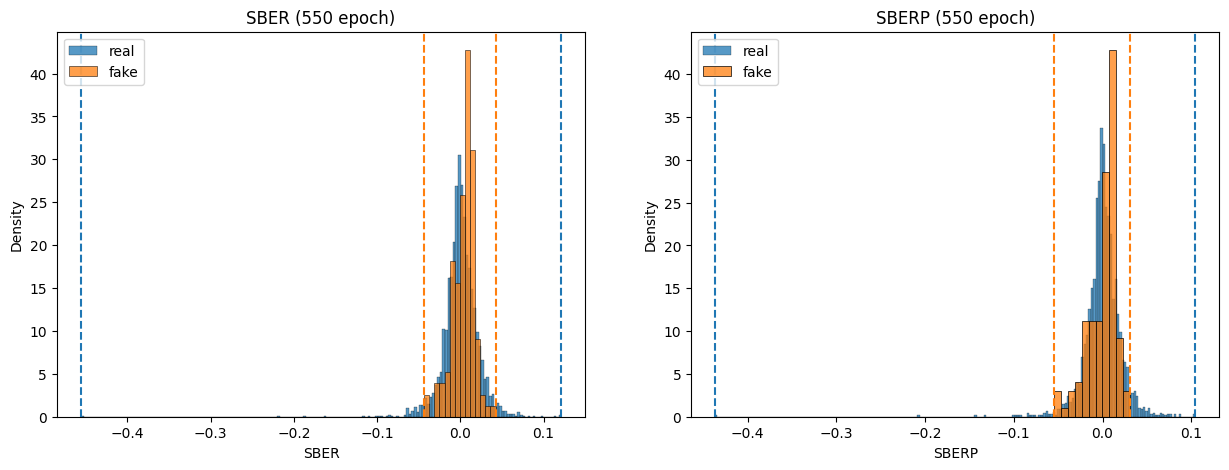

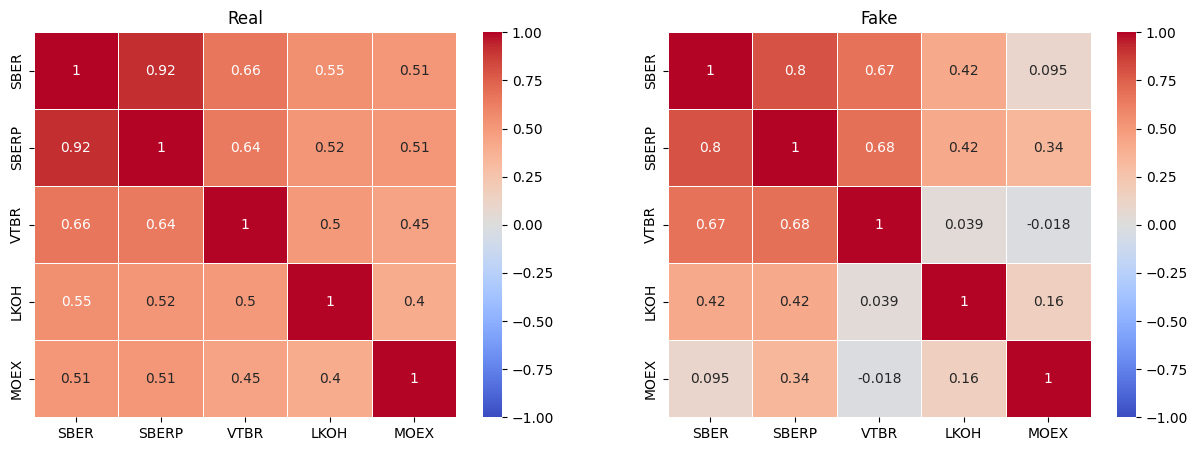

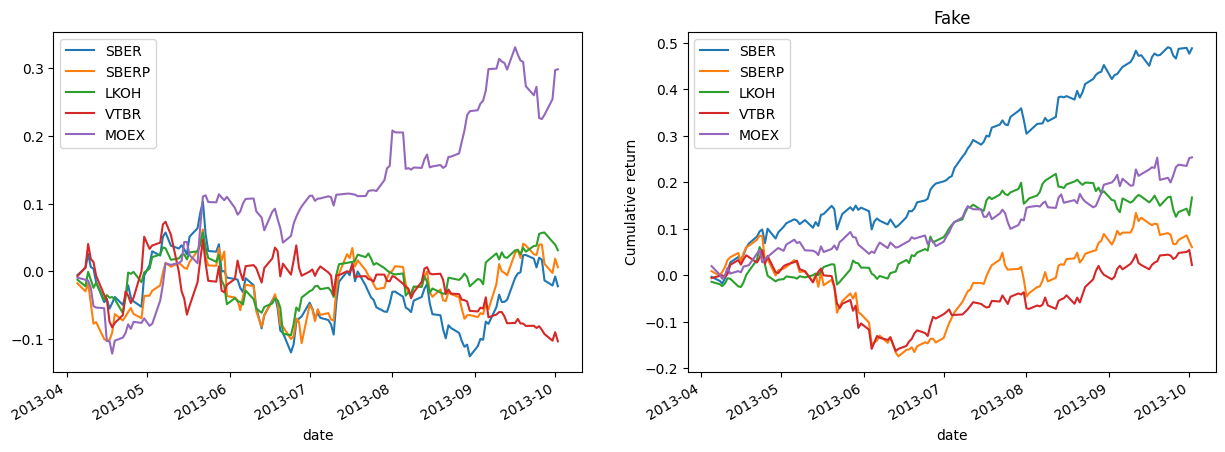

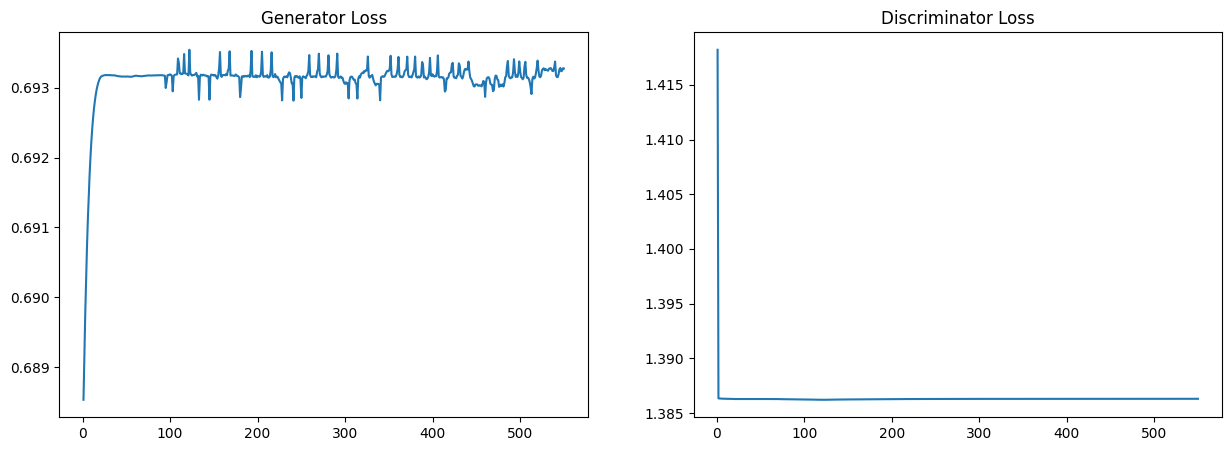

50 epochs train time: 225.3s. Estimated train time: 15.0m
tensor(-0.0111)
1 torch.Size([1, 5, 126])
Fake std: [0.02119515 0.02320546 0.01212388 0.01789031 0.01471994].
Real std: [0.02320357 0.02170969 0.01934618 0.02256658 0.01871406]
Fake correlation: 0.9382949829863565. Real correlation: 0.9185647795211369


/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')
/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')


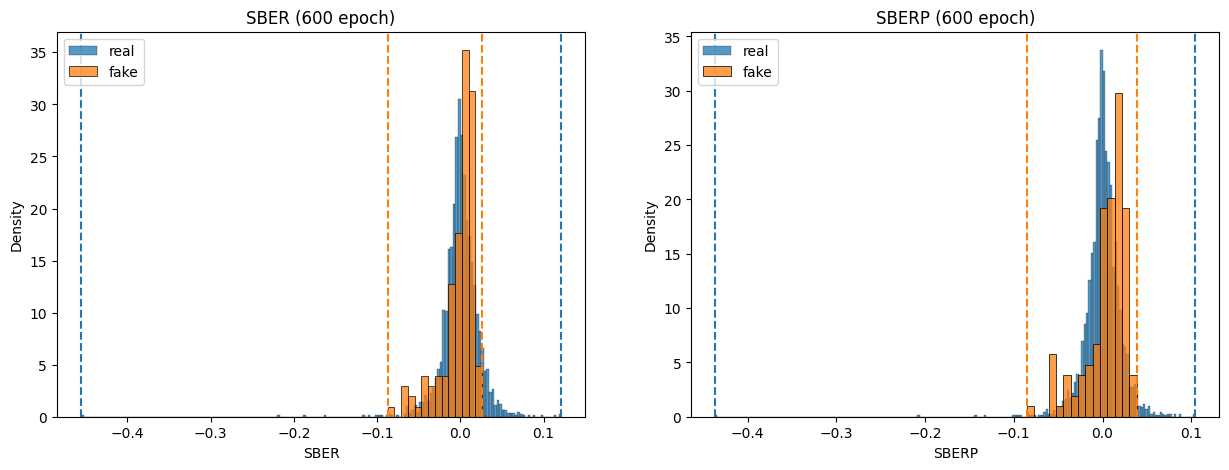

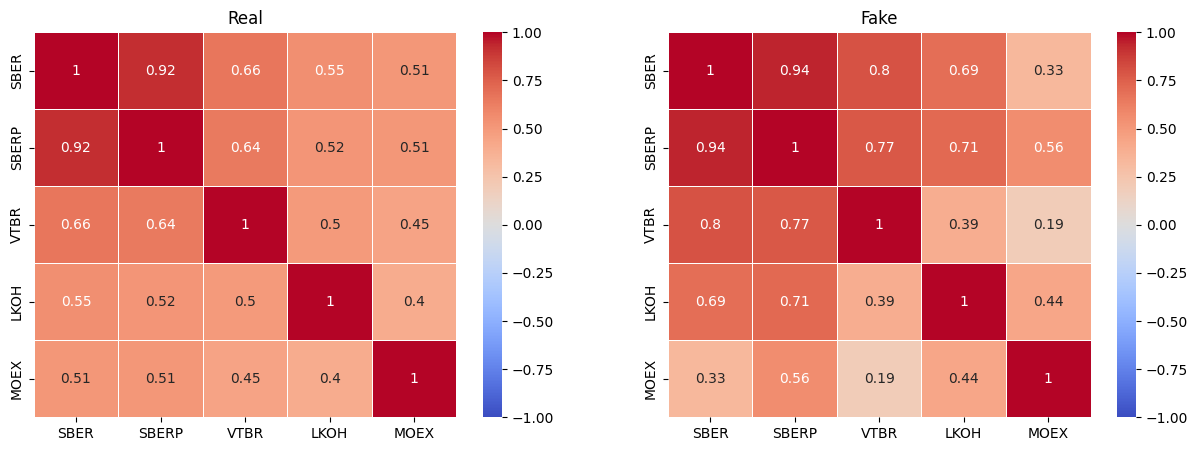

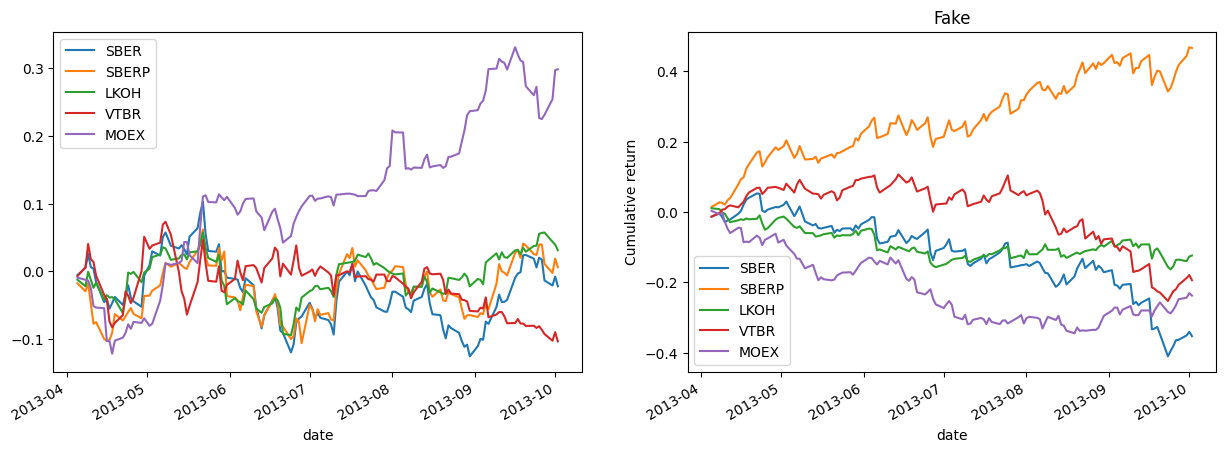

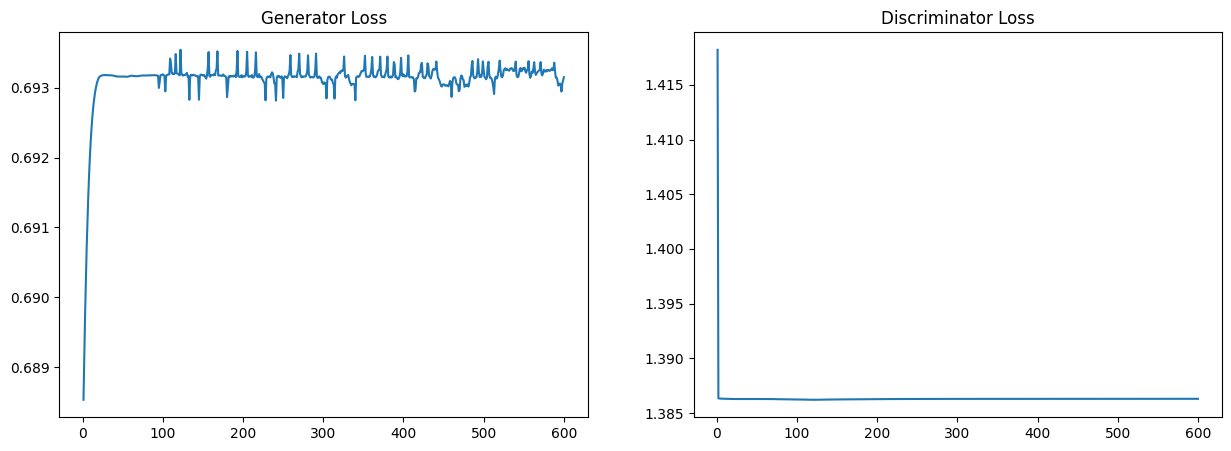

50 epochs train time: 213.0s. Estimated train time: 10.7m
tensor(0.0088)
1 torch.Size([1, 5, 126])
Fake std: [0.02100724 0.02367649 0.01237035 0.01670383 0.01295299].
Real std: [0.02320357 0.02170969 0.01934618 0.02256658 0.01871406]
Fake correlation: 0.9597339951549727. Real correlation: 0.9185647795211369


/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')
/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')


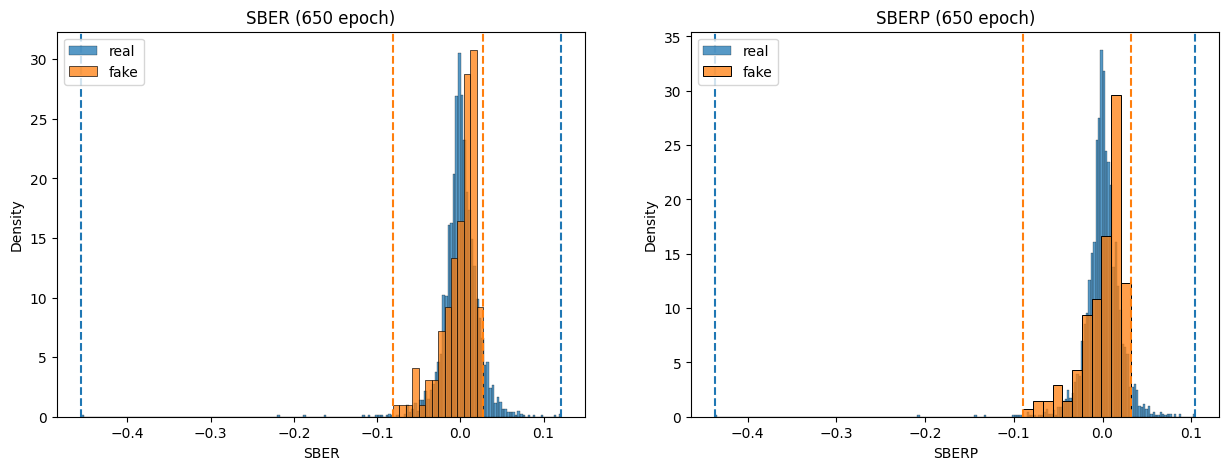

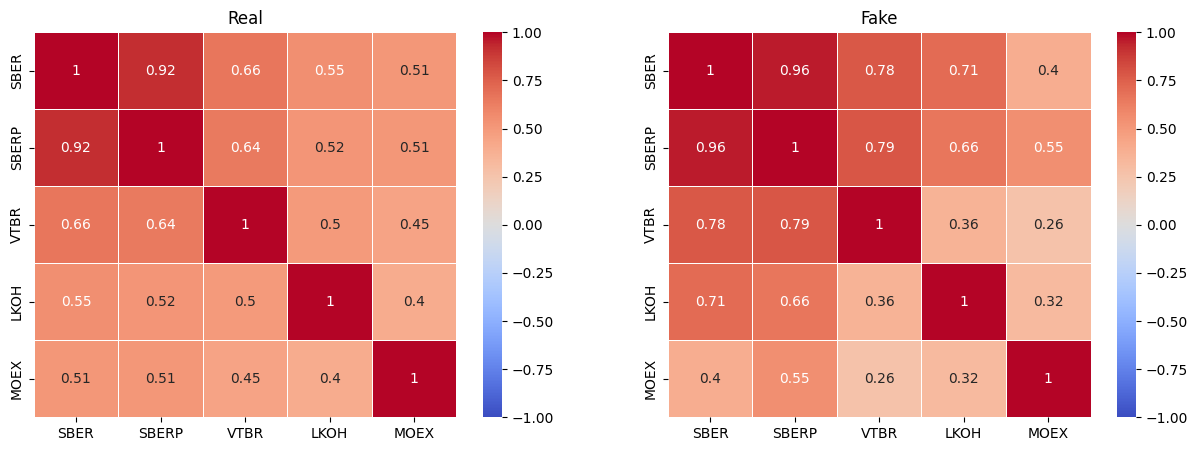

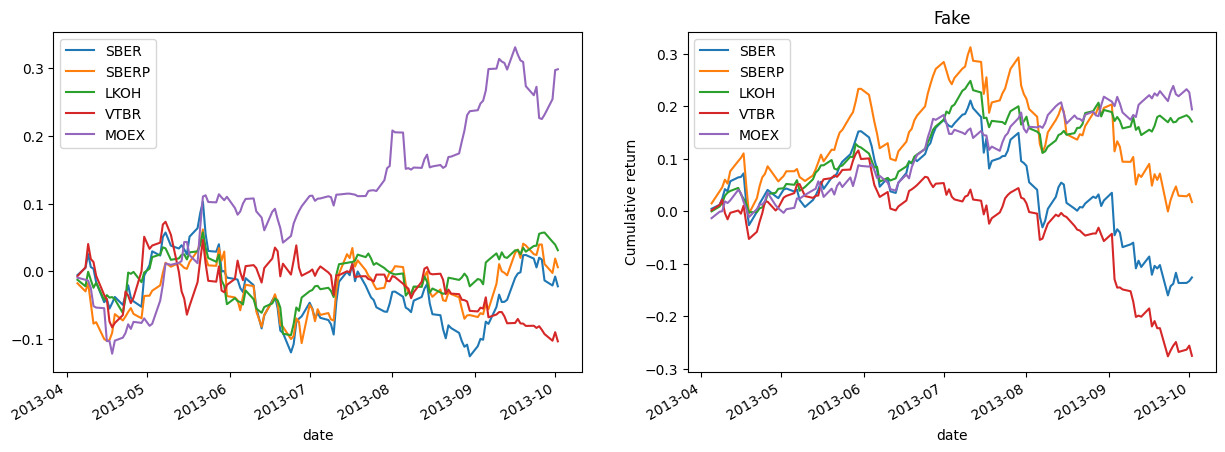

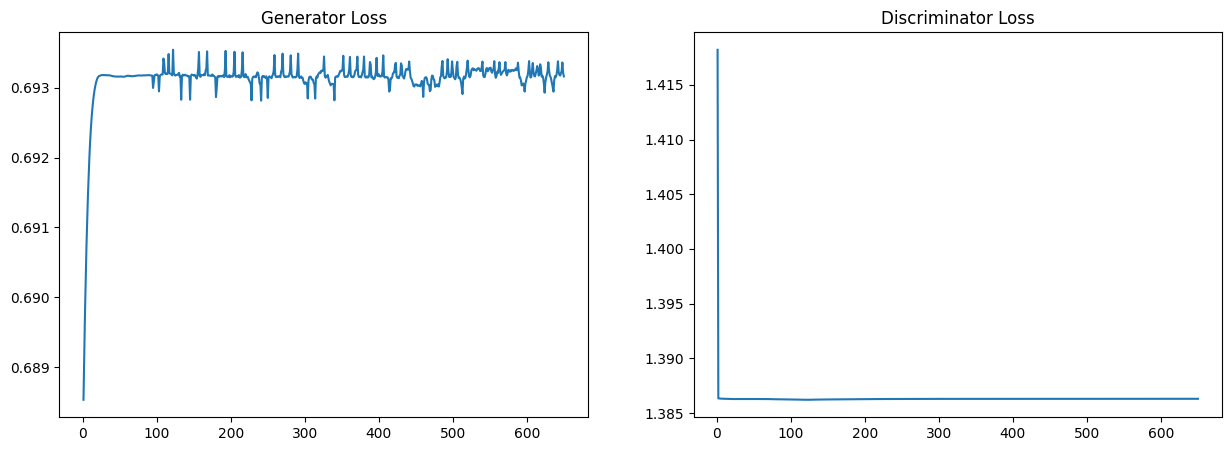

50 epochs train time: 206.1s. Estimated train time: 6.9m
tensor(-0.0445)
1 torch.Size([1, 5, 126])
Fake std: [0.02681808 0.02903858 0.01556932 0.01722113 0.0138407 ].
Real std: [0.02320357 0.02170969 0.01934618 0.02256658 0.01871406]
Fake correlation: 0.966650848206531. Real correlation: 0.9185647795211369


/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')
/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')


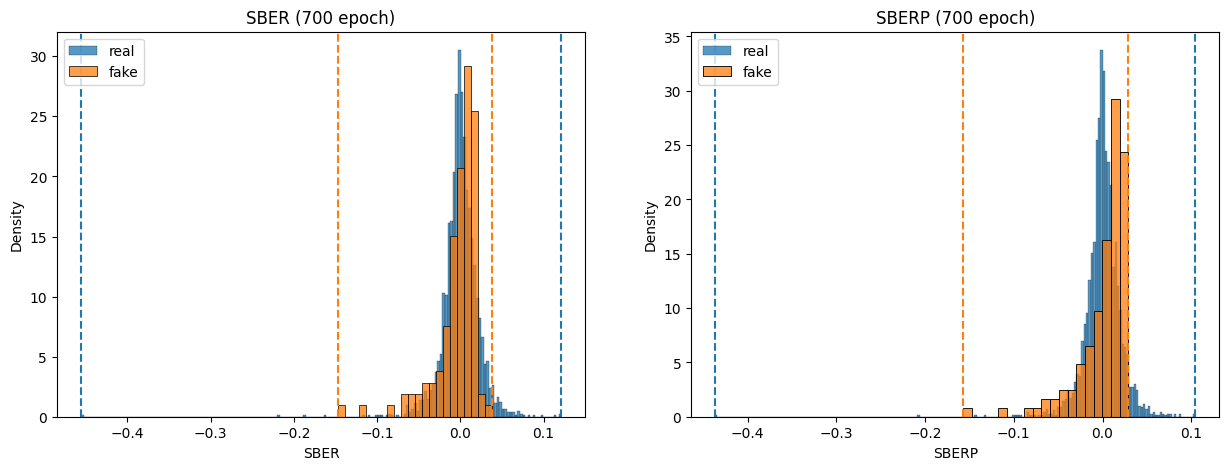

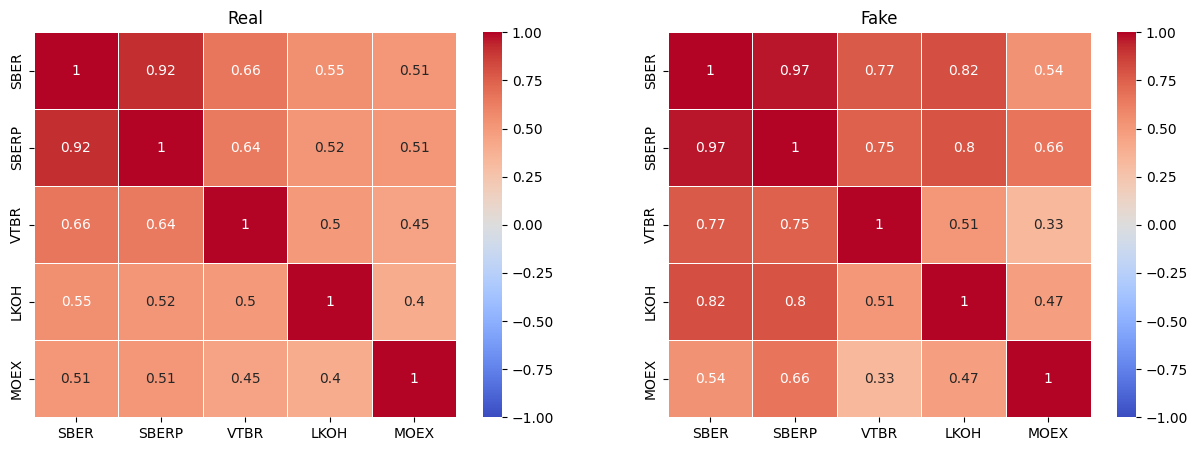

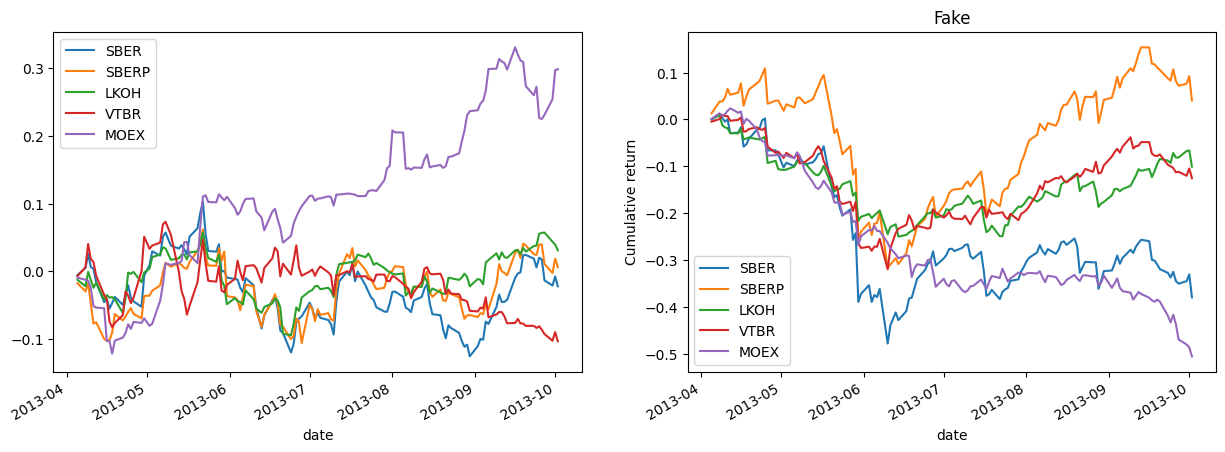

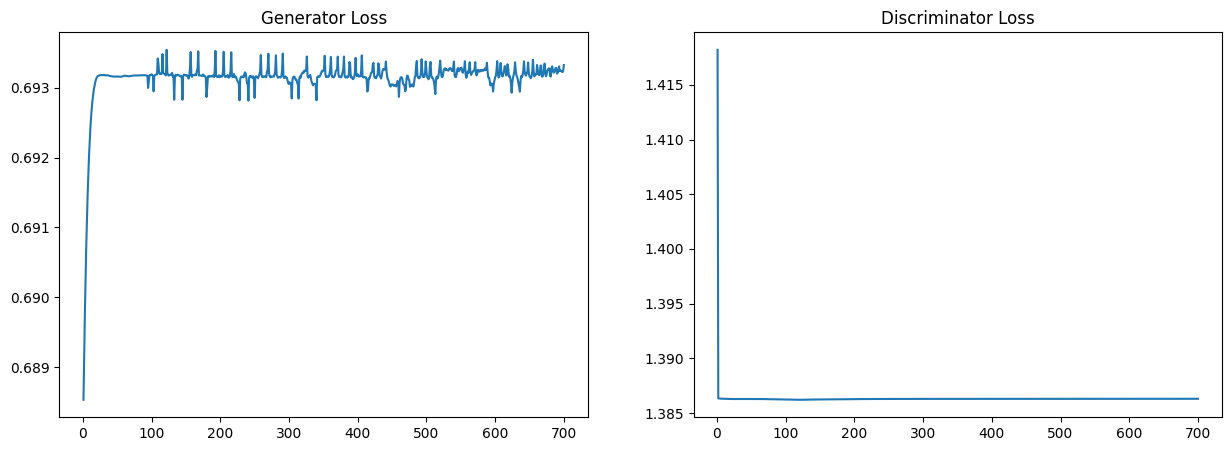

50 epochs train time: 210.0s. Estimated train time: 3.5m
tensor(0.0077)
1 torch.Size([1, 5, 126])
Fake std: [0.01151809 0.01355576 0.01245559 0.01511291 0.01211048].
Real std: [0.02320357 0.02170969 0.01934618 0.02256658 0.01871406]
Fake correlation: 0.8952133899640319. Real correlation: 0.9185647795211369


/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')
/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')


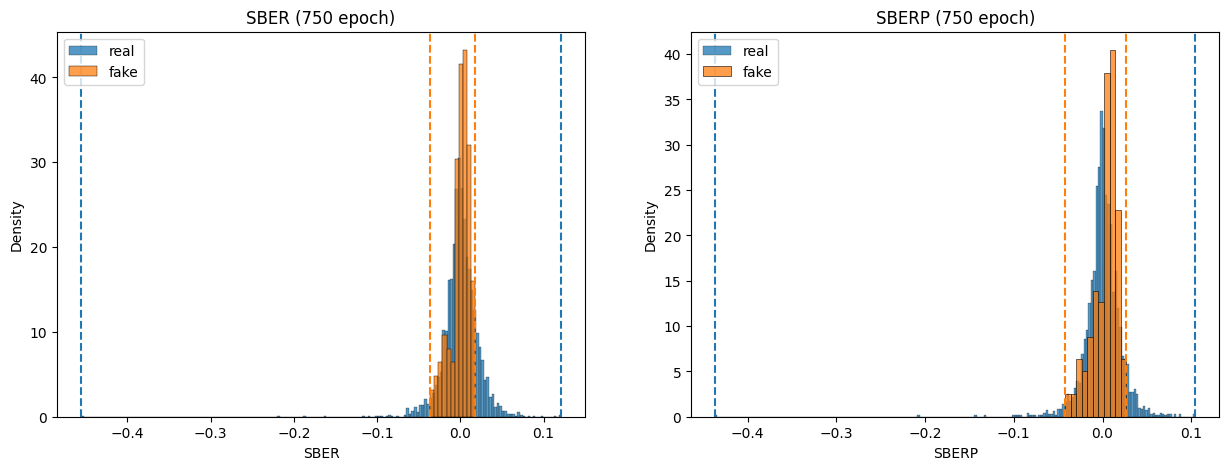

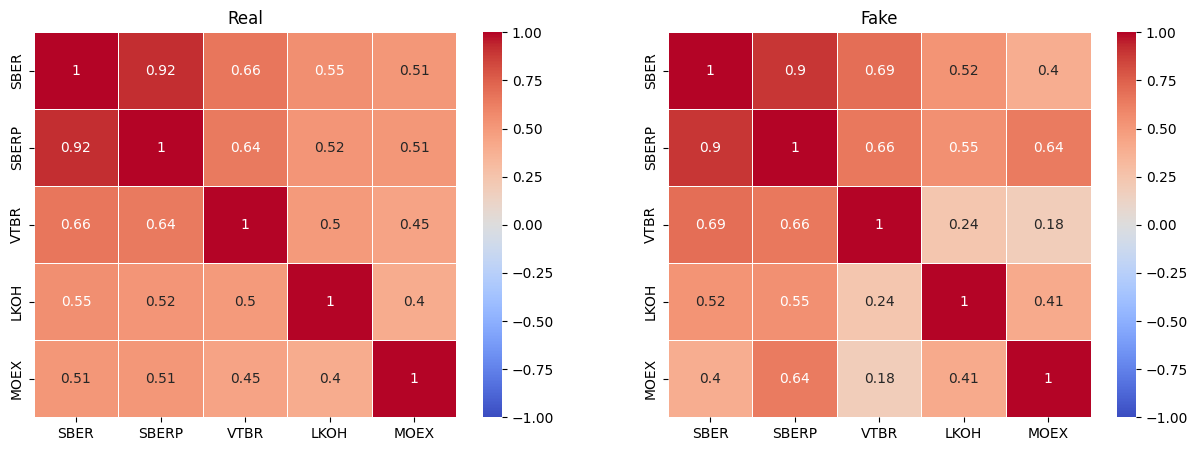

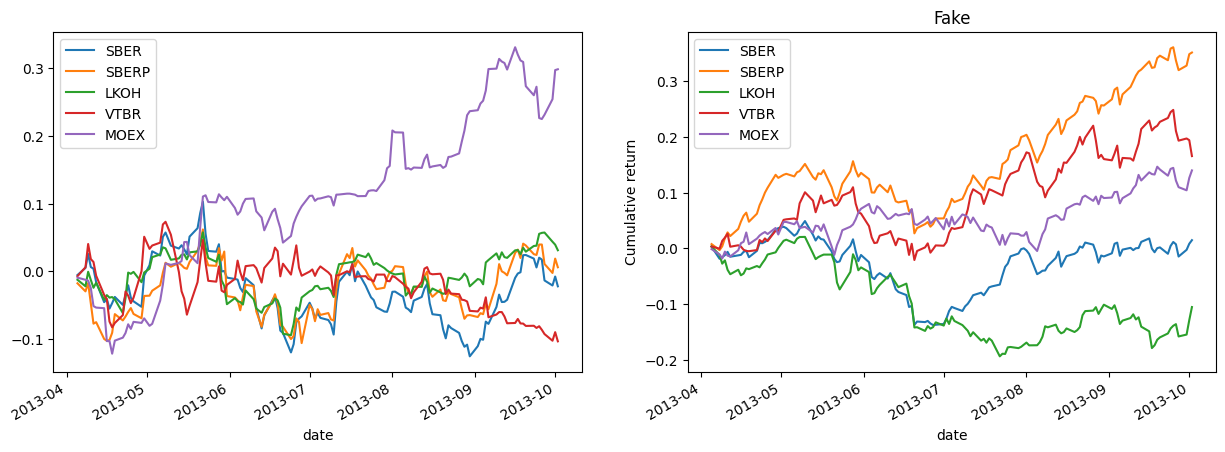

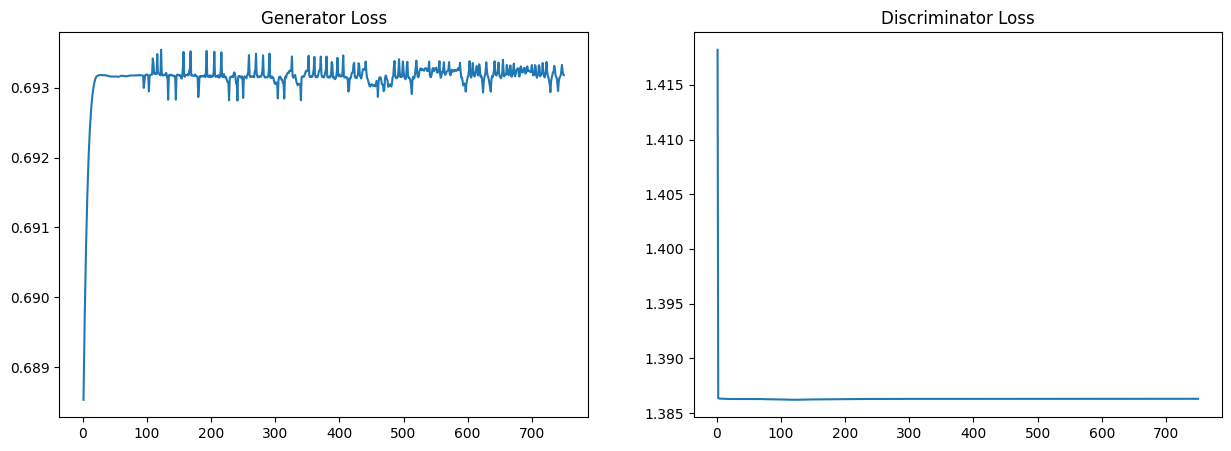

50 epochs train time: 210.7s. Estimated train time: 0.0m
tensor(-0.0281)
1 torch.Size([1, 5, 126])
Fake std: [0.01632534 0.01867847 0.01148259 0.01447759 0.01425528].
Real std: [0.02320357 0.02170969 0.01934618 0.02256658 0.01871406]
Fake correlation: 0.9272084906155188. Real correlation: 0.9185647795211369


/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')
/Users/nikolajgudkov/Desktop/курсач/андрей/gan-moex/library/gan_train_loop_LSTM.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Fake correlation: {df_returns_fake[plot_columns].corr().iloc[0][1]}. Real correlation: {df_returns_real[plot_columns].corr().iloc[0][1]}')


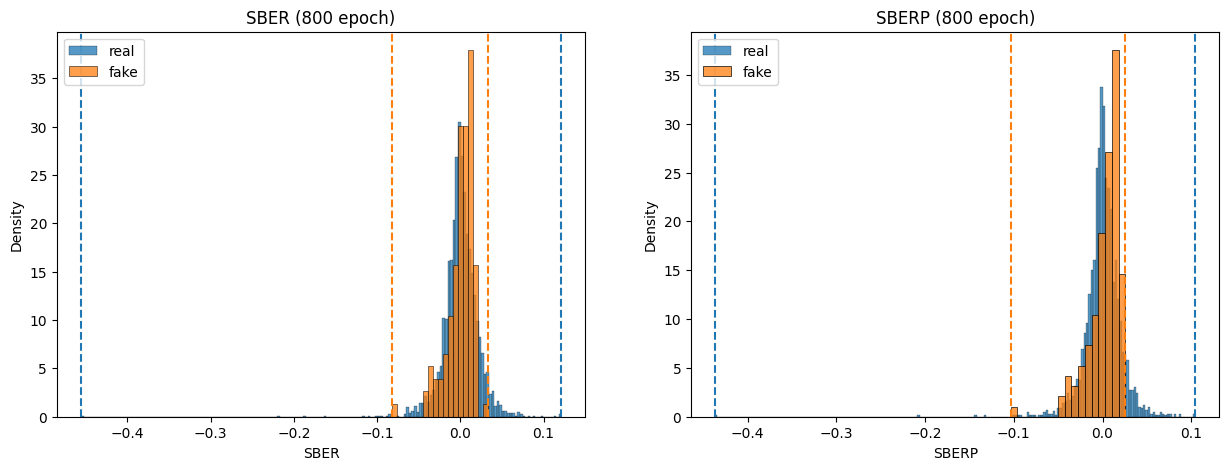

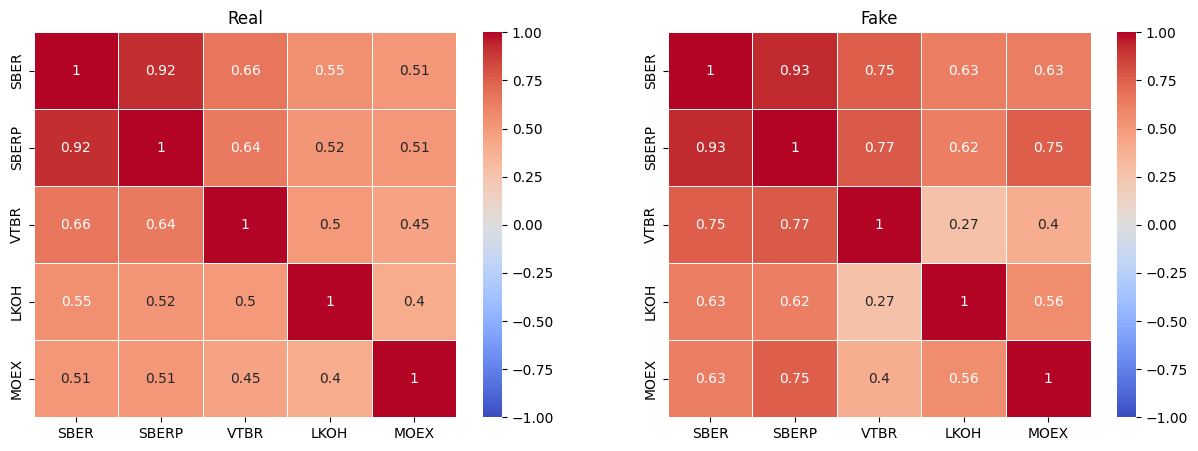

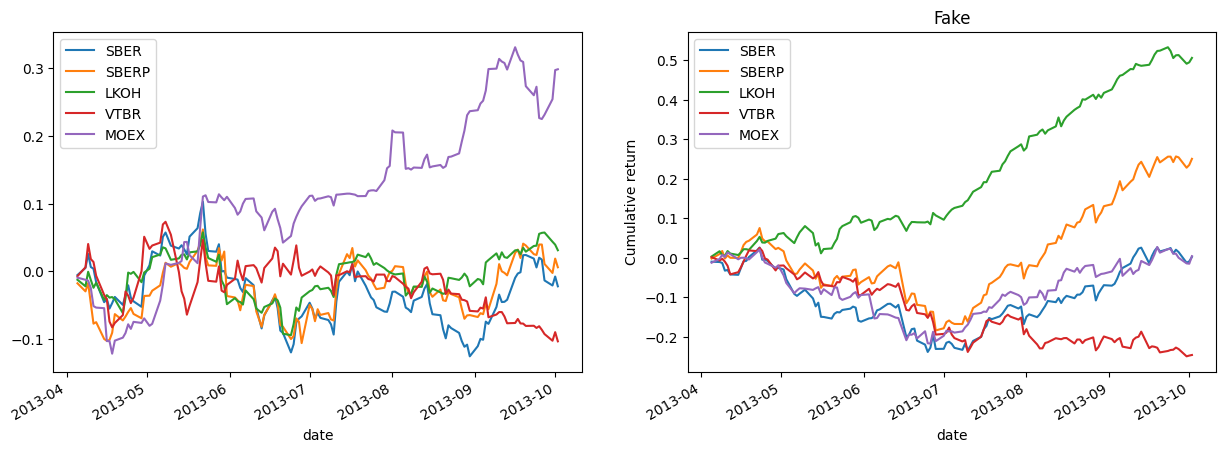

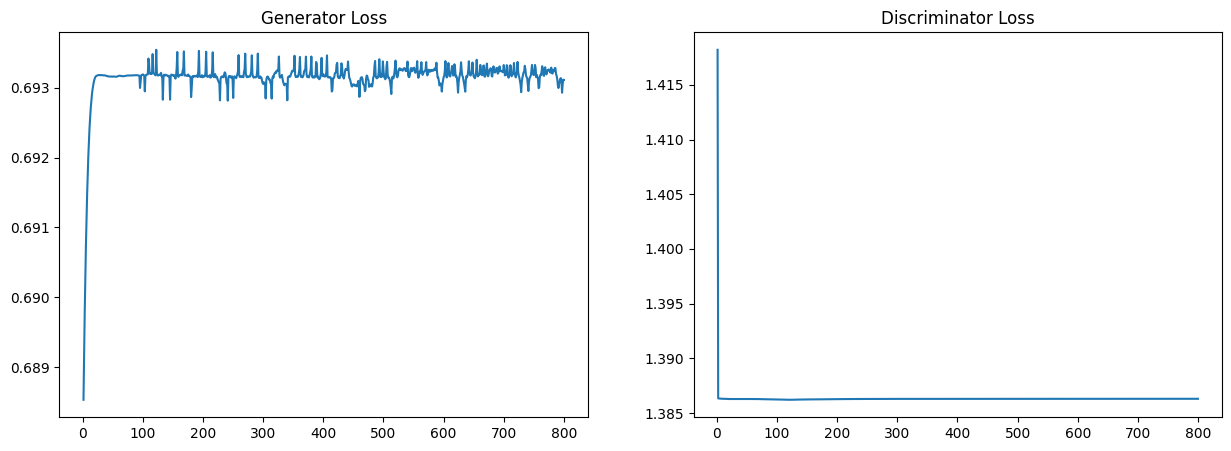

In [8]:
from gan_train_loop_LSTM import train_gan

N_EPOCHS = 800
LOG_FREQUENCY = 50
SAVE_FREQUENCY = 200

# Define generator and discriminator
discriminator = Discriminator().to(DEVICE)
generator = Generator().to(DEVICE)

# Define the optimizers for generator and discriminator
LR = 0.0002
generator_optimizer = optim.RMSprop(generator.parameters(), lr=LR)
discriminator_optimizer = optim.RMSprop(discriminator.parameters(), lr=LR)

# Train GAN
discriminator_losses, generator_losses = train_gan(generator, discriminator, generator_optimizer, discriminator_optimizer, dataloader, df_returns_real, n_epochs=N_EPOCHS, log_frequency=LOG_FREQUENCY, save_frequency=SAVE_FREQUENCY, model_prefix='LSTM')

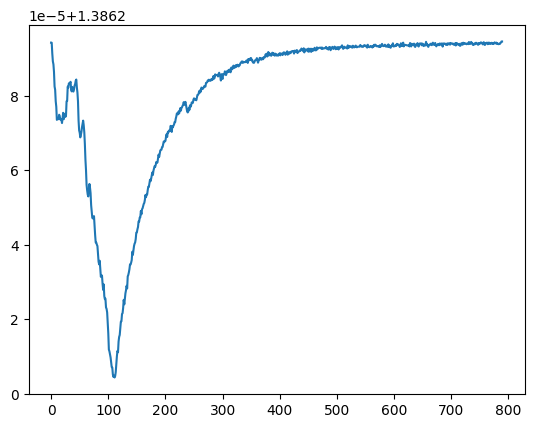

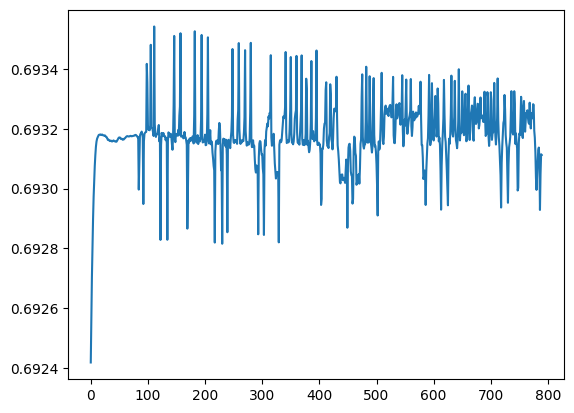

In [9]:
plt.plot(generator_losses[10:])
plt.show()
plt.plot(discriminator_losses[10:])
plt.show()

# Generation

## Generate random history

In [11]:
from gan_train_loop import load_gan

generator = Generator().to(DEVICE)
load_gan('LSTM', generator, epoch=800)

Load 800 epoch checkpoint


In [12]:
Generator()

Generator(
  (tcn): ModuleList(
    (0): TemporalBlock(
      (conv1): Conv1d(15, 10, kernel_size=(1,), stride=(1,))
      (chomp1): Chomp1d()
      (relu1): ReLU()
      (dropout1): Dropout(p=0.2, inplace=False)
      (conv2): Conv1d(10, 10, kernel_size=(1,), stride=(1,))
      (chomp2): Chomp1d()
      (relu2): ReLU()
      (dropout2): Dropout(p=0.2, inplace=False)
      (net): Sequential(
        (0): Conv1d(15, 10, kernel_size=(1,), stride=(1,))
        (1): ReLU()
        (2): Dropout(p=0.2, inplace=False)
        (3): Conv1d(10, 10, kernel_size=(1,), stride=(1,))
        (4): ReLU()
        (5): Dropout(p=0.2, inplace=False)
      )
      (downsample): Conv1d(15, 10, kernel_size=(1,), stride=(1,))
      (relu): ReLU()
    )
    (1): TemporalBlock(
      (conv1): Conv1d(10, 10, kernel_size=(2,), stride=(1,), padding=(1,))
      (chomp1): Chomp1d()
      (relu1): ReLU()
      (dropout1): Dropout(p=0.2, inplace=False)
      (conv2): Conv1d(10, 10, kernel_size=(2,), stride=(1,), padd

In [13]:
from generation import generate_fake_returns
print(df_returns_real.shape)
df_returns_fake = generate_fake_returns(generator, df_returns_real, seed=0)

(2576, 5)
tensor(-0.0230)


## Plot cumulative real and fake returns

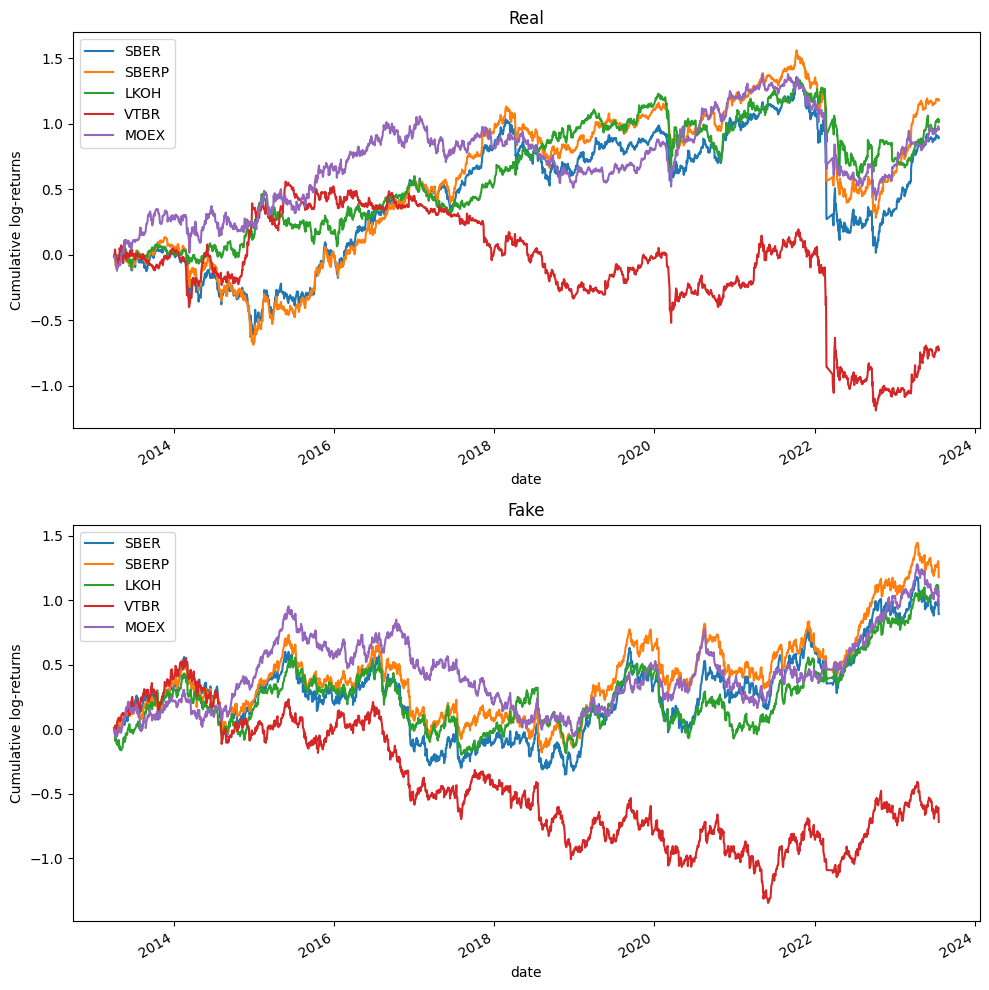

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

plt.subplot(2, 1, 1)

df_returns_real.cumsum().plot(ax=ax1)
plt.title('Real')
plt.ylabel('Cumulative log-returns')

plt.subplot(2, 1, 2)
df_returns_fake.cumsum().plot(ax=ax2)
plt.title('Fake')
plt.ylabel('Cumulative log-returns')
plt.tight_layout()

plt.show()

## Plot correlation matrix for real and fake returns

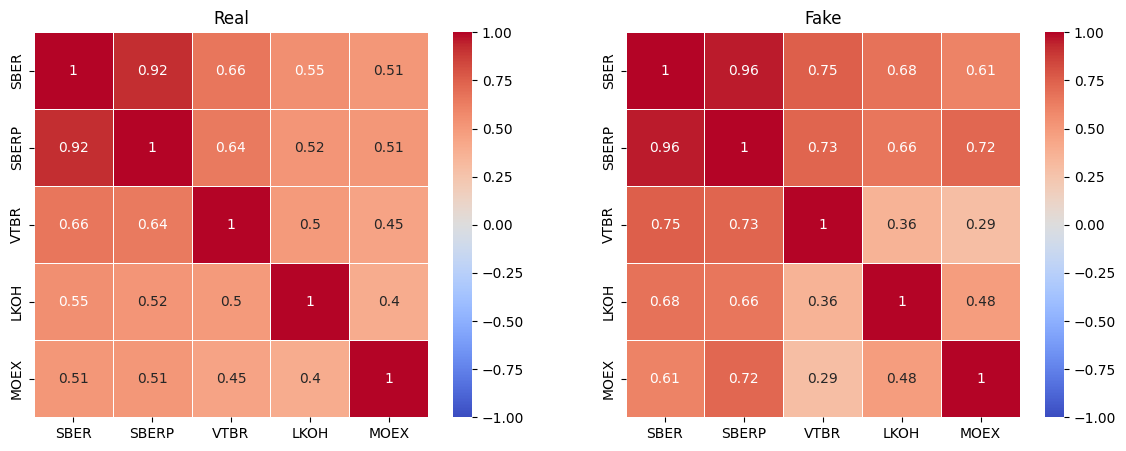

In [15]:
from correlations import plot_correlation_matrix

plt.subplots(1, 2, figsize=(14, 5))

plt.subplot(1, 2, 1)
plot_correlation_matrix(df_returns_real.corr())
plt.title('Real')

plt.subplot(1, 2, 2)
plot_correlation_matrix(df_returns_fake.corr())
plt.title('Fake')

plt.show()

# Plot returns distribution

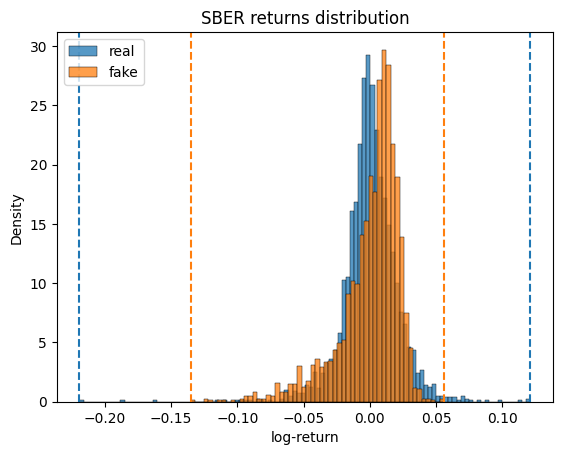

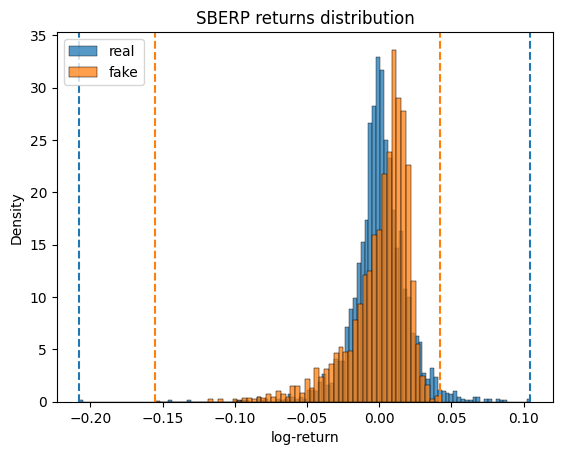

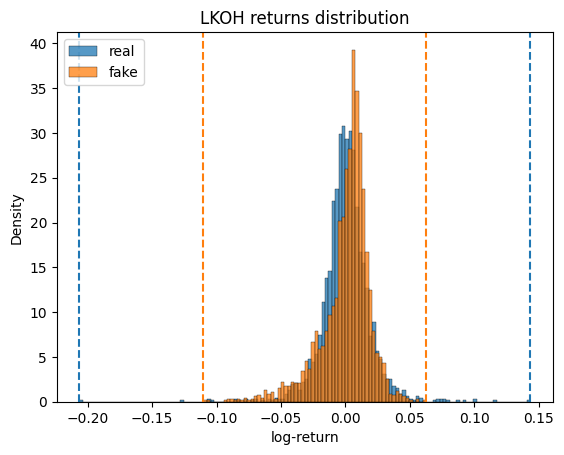

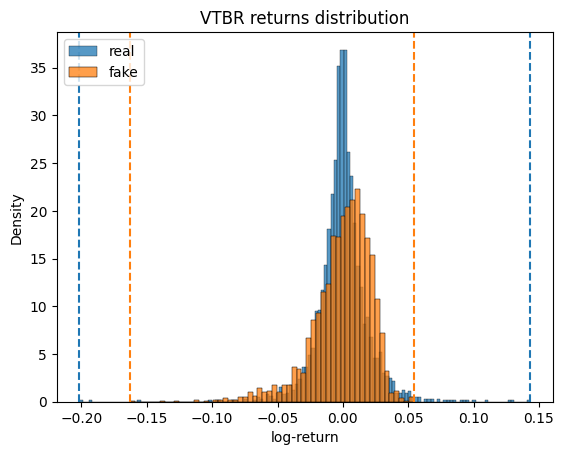

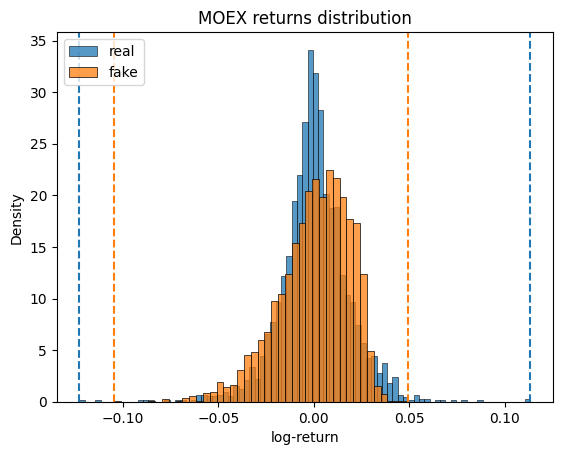

In [16]:
tmp_df_returns_real = df_returns_real[df_returns_real.sum(axis=1) != df_returns_real.sum(axis=1).min()]

for col in df_returns_real.columns:
    # Plot returns distributions
    sns.histplot(tmp_df_returns_real[col], stat='density', label='real')
    sns.histplot(df_returns_fake[col], stat='density', label='fake')

    # Plot real returns bounds
    plt.axvline(tmp_df_returns_real[col].min(), linestyle='dashed', color='C0')
    plt.axvline(tmp_df_returns_real[col].max(), linestyle='dashed', color='C0')

    # Plot fake returns bounds
    plt.axvline(df_returns_fake[col].min(), linestyle='dashed', color='C1')
    plt.axvline(df_returns_fake[col].max(), linestyle='dashed', color='C1')

    plt.xlabel('log-return')
    plt.legend(loc='upper left')
    plt.title(f'{col} returns distribution')
    plt.show()